<a href="https://colab.research.google.com/github/VC-D/Thesis/blob/main/Graph_Metrics_Calculations_Visualizations2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Connecting google drive to google colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **0.0 Imports and database connection**

In [ ]:
# IMPORTS & DB CONNECTION:

import pandas as pd
import sqlite3
import sqlalchemy
import networkx as nx
import logging
import timeit
import itertools
import functools
import scipy.stats
import scipy.sparse
import scipy.sparse.csgraph
import sklearn.cluster
import numpy as np
import seaborn as sns
import community
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from scipy.optimize import curve_fit
from sklearn.manifold import SpectralEmbedding
from sklearn import metrics

In [ ]:

conn = sqlite3.connect('/content/drive/MyDrive/Colab_Notebooks/GRAPHS_RDB_WITH_RESULTS2-003.db')
cur = conn.cursor()


# **0.1 Getting graphs and subgraphs from database**

In [ ]:

            #### GETTING GRAPHS FROM DB. ####

# GRAPH_a:
GRAPH_a = nx.Graph()

nodes_GRAPH_a = "SELECT id FROM NODES_GRAPH_a ;"
cur.execute(nodes_GRAPH_a)
out1 = cur.fetchall()
GRAPH_a.add_nodes_from(out1[0])

edges_GRAPH_a = "SELECT id_1, id_2 FROM GitHub_Social_Network_GRAPH_a ;"
cur.execute(edges_GRAPH_a)
out2 = cur.fetchall()
GRAPH_a.add_edges_from(out2)

# GRAPH_b:
GRAPH_b = nx.Graph()

nodes_GRAPH_b = "SELECT unq_profile_id FROM NODES_GRAPH_b ;"
cur.execute(nodes_GRAPH_b)
out3 = cur.fetchall()
GRAPH_b.add_nodes_from(out3[0])

edges_GRAPH_b = "SELECT profile_id, has_friend_profile_id FROM Social_Circles_from_Facebook_GRAPH_b ;"
cur.execute(edges_GRAPH_b)
out4 = cur.fetchall()
GRAPH_b.add_edges_from(out4)

# GRAPH_c:
GRAPH_c = nx.DiGraph()

nodes_GRAPH_c = "SELECT also_bought_this_product_id_NUMBER_OF_NODES FROM NODES_GRAPH_c ;"
cur.execute(nodes_GRAPH_c)
out5 = cur.fetchall()
GRAPH_c.add_nodes_from(out5[0])

edges_GRAPH_c = "SELECT from_node_id, to_node_id FROM Amazon_Product_Co_Purchasing_Network_GRAPH_c ;"
cur.execute(edges_GRAPH_c)
out6 = cur.fetchall()
GRAPH_c.add_edges_from(out6)

# GRAPH_d:
GRAPH_d = nx.DiGraph()

nodes_GRAPH_d = "SELECT unq_edited_talk_page_user_id_NUMBER_OF_NODES FROM NODES_GRAPH_d ;"
cur.execute(nodes_GRAPH_d)
out7 = cur.fetchall()
GRAPH_d.add_nodes_from(out7[0])

edges_GRAPH_d = "SELECT editor_user_id, edited_talk_page_user_id FROM Communication_Network_Wikipedia_GRAPH_d ;"
cur.execute(edges_GRAPH_d)
out8 = cur.fetchall()
GRAPH_d.add_edges_from(out8)

# Takes around 2 minutes

In [ ]:
print(GRAPH_a)
print(GRAPH_b)
print(GRAPH_c)
print(GRAPH_d)

Graph with 37700 nodes and 289003 edges
Graph with 4039 nodes and 88234 edges
DiGraph with 262111 nodes and 1234877 edges
DiGraph with 2394385 nodes and 5021410 edges


In [ ]:

# Getting the subgraphs from db:

# Strongly Connected Directed subgraph of GRAPH_c:

subgraph_c = nx.DiGraph()

subgraph_c_nodes = "SELECT Nodes FROM nodes_of_strongly_connected_directed_subgraph_of_GRAPH_c ;"
cur.execute(subgraph_c_nodes)
out_sub_c = cur.fetchall()
subgraph_c.add_nodes_from(out_sub_c[0])

subgraph_c_edges = "SELECT from_node, to_node FROM edges_of_strongly_connected_directed_subgraph_of_GRAPH_c;"
cur.execute(subgraph_c_edges)
out_sub_c2 = cur.fetchall()
subgraph_c.add_edges_from(out_sub_c2)

# Strongly Connected Directed subgraph of GRAPH_d:

subgraph_d = nx.DiGraph()

subgraph_d_nodes = "SELECT nodes FROM nodes_of_strongly_connected_directed_subgraph_of_GRAPH_d;"
cur.execute(subgraph_d_nodes)
out_sub_d = cur.fetchall()
subgraph_d.add_nodes_from(out_sub_d[0])

subgraph_d_edges = "SELECT from_node, to_node FROM edges_of_strongly_connected_directed_subgraph_of_GRAPH_d;"
cur.execute(subgraph_d_edges)
out_sub_d2 = cur.fetchall()
subgraph_d.add_edges_from(out_sub_d2)

In [ ]:
print(subgraph_c)
print(subgraph_d)

DiGraph with 241761 nodes and 1131217 edges
DiGraph with 111881 nodes and 1477893 edges


# **0.2 Fetching weakly-disconnected directed graphs, (GRAPH_c GRAPH_d), into strongly connected subgraphs**

In [ ]:
#    Create strongly connected subgraph for directed GRAPH_c function:

def fetch_hugest_subgraph_c(GRAPH_c):
    Gcc_c = max(nx.strongly_connected_components(GRAPH_c), key=len)
    giantC_c = GRAPH_c.subgraph(Gcc_c)
    logging.info('Fetched Giant Subgraph_c')
    return giantC_c

In [ ]:
fetch_subgraph_c = fetch_hugest_subgraph_c(GRAPH_c)

In [ ]:
print(fetch_subgraph_c)

DiGraph with 241761 nodes and 1131217 edges


In [ ]:
# Exporting data of strongly connected directed subgraph_c of GRAPH_c in order to add it into db

# Get nodes of subgraph_c into a csv:

df_sub_nodes_c = pd.DataFrame(fetch_subgraph_c.nodes, columns=['Nodes'])
df_sub_nodes_c.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_sub_nodes_c.csv', index=False)

# Get edges of subgraph_c into a csv:

df_sub_edges_c = pd.DataFrame(fetch_subgraph_c.edges, columns = ['from_node', 'to_node'])
df_sub_edges_c.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_sub_edges_c.csv', index=False)

In [ ]:
#    Create strongly connected subgraph for directed GRAPH_d function:

def fetch_hugest_subgraph_d(GRAPH_d):
    Gcc_d = max(nx.strongly_connected_components(GRAPH_d), key=len)
    giantC_d = GRAPH_d.subgraph(Gcc_d)
    logging.info('Fetched Giant Subgraph_d')
    return giantC_d

In [ ]:
fetch_subgraph_d = fetch_hugest_subgraph_d(GRAPH_d)

In [ ]:
print(fetch_subgraph_d)

DiGraph with 111881 nodes and 1477893 edges


In [ ]:
# Exporting data of strongly connected directed subgraph_d of GRAPH_d in order to add it into db

# Get nodes of subgraph_d into a csv:

df_sub_nodes_d = pd.DataFrame(fetch_subgraph_d.nodes, columns=['nodes'])
df_sub_nodes_d.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_sub_nodes_d.csv', index=False)

# Get edges of subgraph_d into a csv:

df_sub_edges_d = pd.DataFrame(fetch_subgraph_d.edges, columns = ['from_node', 'to_node'])
df_sub_edges_d.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_sub_edges_d.csv', index=False)

# **GRAPH METRICS CALCULATION**

# **1.0 Average path length calculation functions for every graph**

In [ ]:
# 1.0 Average Path Calculation
#      L =sum{s,t in V} / {d(s, t)}{n(n-1)}

#     Function for random sample to calculate avg path of GRAPH_a:

def write_nodes_number_and_shortest_paths_a(GRAPH_a, n_samples_a=10_000, output_path_a='/content/drive/MyDrive/Thesis/colabtest1/graph_info_output_a.txt'):
    with open(output_path_a, encoding='utf-8', mode='w+') as f:
        for component in nx.connected_components(GRAPH_a):
            component_a = GRAPH_a.subgraph(component)
            nodes_a = component_a.nodes()
            lengths_a = []
            for _ in range(n_samples_a):
                n1, n2 = random.choices(list(nodes_a), k=2)
                length_a = nx.shortest_path_length(component_a, source=n1, target=n2)
                lengths_a.append(length_a)
            f.write(f'Nodes num: {len(nodes_a)}, shortest path mean: {mean(lengths_a)} \n')
            return lengths_a

In [ ]:
# 1. Average Path Calculation
#      L =sum{s,t in V} / {d(s, t)}{n(n-1)}

#    Function for random sample to calculate avg path of GRAPH_b:

def write_nodes_number_and_shortest_paths_b(GRAPH_b, n_samples_b=10_000, output_path_b='/content/drive/MyDrive/Thesis/colabtest1/graph_info_output_b.txt'):
    with open(output_path_b, encoding='utf-8', mode='w+') as f:
        for component in nx.connected_components(GRAPH_b):
            component_b = GRAPH_b.subgraph(component)
            nodes_b = component_b.nodes()
            lengths_b = []
            for _ in range(n_samples_b):
                n1, n2 = random.choices(list(nodes_b), k=2)
                length_b = nx.shortest_path_length(component_b, source=n1, target=n2)
                lengths_b.append(length_b)
            f.write(f'Nodes num: {len(nodes_b)}, shortest path mean: {mean(lengths_b)} \n')
            return lengths_b

In [ ]:
# 1. Average Path Calculation
#      L =sum{s,t in V} / {d(s, t)}{n(n-1)}

#    Function for random sample to calculate avg path of GRAPH_c:

def avg_path_length(subgraph_c, n_samples_c=10_000, output_path_c='/content/drive/MyDrive/Thesis/colabtest1/graph_info_output_c.txt'):
    with open(output_path_c, encoding='utf-8', mode='w+') as f:
            for component_c in nx.strongly_connected_components(subgraph_c):
                component_c = subgraph_c.subgraph(component_c)
                nodes_c = component_c.nodes()
                lengths_c = []
            for _ in range(n_samples_c):
                n1, n2 = random.choices(list(nodes_c), k=2)
                length_c = nx.shortest_path_length(component_c, source=n1, target=n2)
                lengths_c.append(length_c)
            f.write(f'Nodes num: {len(nodes_c)}, shortest path mean: {mean(lengths_c)} \n')
            return lengths_c

In [ ]:
# 1. Average Path Calculation
#      L =sum{s,t in V} / {d(s, t)}{n(n-1)}

#    Function for random sample to calculate avg path of GRAPH_d:

def write_nodes_number_and_shortest_paths_d(subgraph_d, n_samples_d=10_000, output_path_d='/content/drive/MyDrive/Thesis/colabtest1/graph_info_output_d.txt'):
    with open(output_path_d, encoding='utf-8', mode='w+') as f:
        for component in nx.strongly_connected_components(subgraph_d):
            component_d = subgraph_d.subgraph(component)
            nodes_d = component_d.nodes()
            lengths_d = []
            for _ in range(n_samples_d):
                n1, n2 = random.choices(list(nodes_d), k=2)
                length_d = nx.shortest_path_length(component_d, source=n1, target=n2)
                lengths_d.append(length_d)
            f.write(f'Nodes num: {len(nodes_d)}, shortest path mean: {mean(lengths_d)} \n')
            return lengths_d

In [ ]:
avg_path_a = write_nodes_number_and_shortest_paths_a(GRAPH_a)

In [ ]:
avg_path_b = write_nodes_number_and_shortest_paths_b(GRAPH_b)

In [ ]:
avg_path_length_c = avg_path_length(subgraph_c, n_samples_c=10_000)

In [ ]:
avg_path_d = write_nodes_number_and_shortest_paths_d(subgraph_d)

# **2.0 Density calculation**

In [ ]:
# 2.0 Density Calculation (undirected graphs):
#     D = 2e / [ v * ( v - 1 ) ]

Density_GRAPH_a = nx.density(GRAPH_a)
Density_GRAPH_b = nx.density(GRAPH_b)

# Results:

print(round(Density_GRAPH_a, 5))
print(round(Density_GRAPH_b, 5))

0.00041
0.01082


In [ ]:
# 2.1 Density Calculation (directed graphs):
#     D = e / [ v * ( v - 1 ) ]

Density_GRAPH_c = nx.density(GRAPH_c)
Density_GRAPH_d = nx.density(GRAPH_d)

# Results:

print(round(Density_GRAPH_c, 10))
print(round(Density_GRAPH_d, 12))

1.79744e-05
8.75866e-07


# **3.0 Degree calculation**

In [ ]:
# 3.0 Degree Calculation (undirected graphs):

Degree_GRAPH_a = GRAPH_a.degree()
Degree_GRAPH_b = GRAPH_b.degree()

# Results:

# Degree_GRAPH_a:
df_degree_a = pd.DataFrame(Degree_GRAPH_a, columns=['nodes', 'degrees'])
# Degree_GRAPH_b:
df_degree_b = pd.DataFrame(Degree_GRAPH_b, columns=['nodes', 'degrees'])

In [ ]:
df_degree_a

,nodes,degrees
0,0,1
1,23977,32
2,1,8
3,34526,2
4,2370,40
...,...,...
37695,35174,1
37696,37485,1
37697,37431,1
37698,37409,1


In [ ]:
df_degree_b

,nodes,degrees
0,1,17
1,0,347
2,2,10
3,3,17
4,4,10
...,...,...
4034,4034,2
4035,4035,1
4036,4036,2
4037,4037,4


In [ ]:
# 3.1 Degree Calculation (directed graphs):

Degree_GRAPH_c = GRAPH_c.degree()
Degree_GRAPH_d = GRAPH_d.degree()

# Results:

# Degree_GRAPH_c:
df_degree_c = pd.DataFrame(Degree_GRAPH_c, columns=['nodes', 'degrees'])
# Degree_GRAPH_d:
df_degree_d = pd.DataFrame(Degree_GRAPH_d, columns=['nodes', 'degrees'])

In [ ]:
df_degree_c

,nodes,degrees
0,0,7
1,1,6
2,2,7
3,3,6
4,4,30
...,...,...
262106,262107,8
262107,262106,7
262108,262105,6
262109,262110,6


In [ ]:
df_degree_d

,nodes,degrees
0,0,3
1,1,5
2,2,236
3,21,85
4,46,308
...,...,...
2394380,2393725,1
2394381,2393740,1
2394382,2393816,1
2394383,2393817,1


In [ ]:
# Exporting 3 results

df_degree_a.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_degree_a.csv', index=False)
df_degree_b.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_degree_b.csv', index=False)
df_degree_c.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_degree_c.csv', index=False)
df_degree_d.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_degree_d.csv', index=False)

# **3.2 Average degree calculation**

In [ ]:
# 3.2 Average Degree Calculation:

# GRAPH_a:
avg_degree_GRAPH_a = df_degree_a['degrees'].mean()
# GRAPH_b:
avg_degree_GRAPH_b = df_degree_b['degrees'].mean()
# GRAPH_c:
avg_degree_GRAPH_c = df_degree_c['degrees'].mean()
# GRAPH_d:
avg_degree_GRAPH_d = df_degree_d['degrees'].mean()

In [ ]:
round(avg_degree_GRAPH_a, 3)

15.332

In [ ]:
round(avg_degree_GRAPH_b, 3)

43.691

In [ ]:
round(avg_degree_GRAPH_c, 3)

9.423

In [ ]:
round(avg_degree_GRAPH_d, 3)

4.194

# **4.0 Diameter calculation**

In [ ]:
#  4. Diameter approximation:
#     Diameter = maximum Eccentricity

diam_a = nx.approximation.diameter(GRAPH_a)
diam_b = nx.approximation.diameter(GRAPH_b)
diam_c = nx.approximation.diameter(subgraph_c)
diam_d = nx.approximation.diameter(subgraph_d)

In [ ]:
print(diam_a)
print(diam_b)
print(diam_c)
print(diam_d)

11
8
88
10


# **5.0 Clustering coefficient calculation**

In [ ]:
# 5.0 Clustering Coefficient for nodes calculation:
#     for unweighted graphs:
#     c_u = \frac{2 T(u)}{deg(u)(deg(u)-1)}

clust_coef_a = nx.clustering(GRAPH_a, weight=None)
df_clust_coef_a = pd.DataFrame(clust_coef_a.items(), columns=['node','clustering_coefficient'])

clust_coef_b = nx.clustering(GRAPH_b, weight=None)
df_clust_coef_b = pd.DataFrame(clust_coef_b.items(), columns=['node','clustering_coefficient'])

clust_coef_c = nx.clustering(GRAPH_c, weight=None)
df_clust_coef_c = pd.DataFrame(clust_coef_c.items(), columns=['node','clustering_coefficient'])

clust_coef_d = nx.clustering(GRAPH_d, weight=None)
df_clust_coef_d = pd.DataFrame(clust_coef_d.items(), columns=['node','clustering_coefficient'])


In [ ]:
df_clust_coef_a

,node,clustering_coefficient
0,0,0.000000
1,23977,0.098790
2,1,0.178571
3,34526,0.000000
4,2370,0.176923
...,...,...
37695,35174,0.000000
37696,37485,0.000000
37697,37431,0.000000
37698,37409,0.000000


In [ ]:
df_clust_coef_d

,node,clustering_coefficient
0,0,0.000000
1,1,0.300000
2,2,0.093428
3,21,0.078055
4,46,0.119617
...,...,...
2394380,2393725,0.000000
2394381,2393740,0.000000
2394382,2393816,0.000000
2394383,2393817,0.000000


In [ ]:
# Exporting 5.0 Results

df_clust_coef_a.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_clustering_coefficient_a.csv', index=False)
df_clust_coef_b.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_clustering_coefficient_b.csv', index=False)
df_clust_coef_c.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_clustering_coefficient_c.csv', index=False)
df_clust_coef_d.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_clustering_coefficient_d.csv', index=False)


In [ ]:
# 5.1 Average clustering coefficient calculation:

p_a1 = "/content/drive/MyDrive/Thesis/colabtest1/df_clustering_coefficient_a.csv"
dfcc_a = pd.read_csv(p_a1)
average_clustering_coefficient_a = dfcc_a['clustering_coefficient'].mean()

p_b1 = "/content/drive/MyDrive/Thesis/colabtest1/df_clustering_coefficient_b.csv"
dfcc_b = pd.read_csv(p_b1)
average_clustering_coefficient_b = dfcc_b['clustering_coefficient'].mean()

p_c1 = "/content/drive/MyDrive/Thesis/colabtest1/df_clustering_coefficient_c.csv"
dfcc_c = pd.read_csv(p_c1)
average_clustering_coefficient_c = dfcc_c['clustering_coefficient'].mean()

p_d1 = "/content/drive/MyDrive/Thesis/colabtest1/df_clustering_coefficient_d.csv"
dfcc_d = pd.read_csv(p_d1)
average_clustering_coefficient_d = dfcc_d['clustering_coefficient'].mean()


In [ ]:
average_clustering_coefficient_a

0.1675370448010758

In [ ]:
average_clustering_coefficient_b

0.6055467186200862

In [ ]:
average_clustering_coefficient_c

0.3468794075698955

In [ ]:
average_clustering_coefficient_d

0.03931553579554354

# **6.0 Average clustering coefficient calculation**

In [ ]:
# 6.0 Average Clustering Coefficient calculation:
#      C = \frac{1}{n}\sum_{v \in G} c_v

avg_cc_a = nx.average_clustering(GRAPH_a, weight=None)
avg_cc_b = nx.average_clustering(GRAPH_b, weight=None)
avg_cc_c = nx.average_clustering(GRAPH_c, weight=None)

In [ ]:
print(round(avg_cc_a, 2))

0.17


In [ ]:
print(round(avg_cc_b, 2))

0.61


In [ ]:
print(round(avg_cc_c, 2))

0.35


In [ ]:
avg_cl_co_d = nx.average_clustering(GRAPH_d, weight=None) # ----> took 40 minutes

In [ ]:
print(round(avg_cl_co_d, 2))

0.04


In [ ]:
avg_cc_d = nx.average_clustering(subgraph_d, weight=None)

In [ ]:
print(round(avg_cc_d, 2))

0.15


# **7.0 Centrality measures calculation**

In [ ]:
# 7.0  Centrality measures:

#  7.1.1  Degree Centrality calculation:
#         The degree centrality for a node v is the fraction of nodes it is connected to

degree_centr_a = nx.degree_centrality(GRAPH_a)
df_dc_a = pd.DataFrame(degree_centr_a.items(), columns=['node','degree_centrality'])

degree_centr_b = nx.degree_centrality(GRAPH_b)
df_dc_b = pd.DataFrame(degree_centr_b.items(), columns=['node','degree_centrality'])

degree_centr_c = nx.degree_centrality(GRAPH_c)
df_dc_c = pd.DataFrame(degree_centr_c.items(), columns=['node','degree_centrality'])

degree_centr_d = nx.degree_centrality(GRAPH_d)
df_dc_d = pd.DataFrame(degree_centr_d.items(), columns=['node','degree_centrality'])


In [ ]:
# Exporting the above results as dataframes.csv:

df_dc_a.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_degree_centrality_a.csv', index=False)
df_dc_b.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_degree_centrality_b.csv', index=False)
df_dc_c.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_degree_centrality_c.csv', index=False)
df_dc_d.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_degree_centrality_d.csv', index=False)


In [ ]:
# 7.1.2 Average degree centrality calculation

path_a1 = "/content/drive/MyDrive/Thesis/colabtest1/df_degree_centrality_a.csv"
dfdc_a = pd.read_csv(path_a1)
average_degree_centrality_GRAPH_a = dfdc_a['degree_centrality'].mean()

path_b1 = "/content/drive/MyDrive/Thesis/colabtest1/df_degree_centrality_b.csv"
dfdc_b = pd.read_csv(path_b1)
average_degree_centrality_GRAPH_b = dfdc_b['degree_centrality'].mean()

path_c1 = "/content/drive/MyDrive/Thesis/colabtest1/df_degree_centrality_c.csv"
dfdc_c = pd.read_csv(path_c1)
average_degree_centrality_GRAPH_c = dfdc_c['degree_centrality'].mean()

path_d1 = "/content/drive/MyDrive/Thesis/colabtest1/df_degree_centrality_d.csv"
dfdc_d = pd.read_csv(path_d1)
average_degree_centrality_GRAPH_d = dfdc_d['degree_centrality'].mean()


In [ ]:
print(average_degree_centrality_GRAPH_a)

0.0004066878203116783


In [ ]:
print(average_degree_centrality_GRAPH_b)

0.01081996350343924


In [ ]:
print(average_degree_centrality_GRAPH_c)

3.594883822961181e-05


In [ ]:
print(average_degree_centrality_GRAPH_d)

1.7517329290270398e-06


In [ ]:
# 7.2 Closeness Centrality calculation:
#     C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}

In [ ]:
# Took 1 hour

cc_a = nx.closeness_centrality(GRAPH_a, wf_improved=True)


In [ ]:
df_cc_a = pd.DataFrame(cc_a.items(), columns=['node','closeness_centrality'])
df_cc_a

,node,closeness_centrality
0,0,0.275027
1,23977,0.379357
2,1,0.294980
3,34526,0.287230
4,2370,0.375365
...,...,...
37695,35174,0.235560
37696,37485,0.261948
37697,37431,0.267855
37698,37409,0.294862


In [ ]:
# Took 53 minutes

cc_b = nx.closeness_centrality(GRAPH_b, wf_improved=True)


In [ ]:
df_cc_b = pd.DataFrame(cc_b.items(), columns=['node','closeness_centrality'])
df_cc_b

,node,closeness_centrality
0,1,0.261376
1,0,0.353343
2,2,0.261258
3,3,0.261376
4,4,0.261258
...,...,...
4034,4034,0.183989
4035,4035,0.183980
4036,4036,0.183989
4037,4037,0.184005


In [ ]:
# Calculating Closeness Centrality for big directed graphs (GRAPH_c, GRAPH_d):

def closeness_centrality(G, u=None, distance=None, wf_improved=True):
    if G.is_directed():
        G = G.reverse()  # create a reversed graph view

    if distance is not None:
        # use Dijkstra's algorithm with specified attribute as edge weight
        path_length = functools.partial(
            nx.single_source_dijkstra_path_length, weight=distance
        )
    else:
        path_length = nx.single_source_shortest_path_length

    if u is None:
        nodes = random.sample(G.nodes, 10000)
    else:
        nodes = [u]
    closeness_dict = {}
    for n in nodes:
        sp = path_length(G, n)
        totsp = sum(sp.values())
        len_G = len(G)
        _closeness_centrality = 0.0
        if totsp > 0.0 and len_G > 1:
            _closeness_centrality = (len(sp) - 1.0) / totsp
            # normalize to number of nodes-1 in connected part
            if wf_improved:
                s = (len(sp) - 1.0) / (len_G - 1)
                _closeness_centrality *= s
        closeness_dict[n] = _closeness_centrality
    if u is not None:
        return closeness_dict[u]
    return closeness_dict


In [ ]:
# Took 7 minutes for random sample of 1000

cc_c = closeness_centrality(GRAPH_c, u=None, distance=None, wf_improved=True)
df_cc_c = pd.DataFrame(cc_c.items(), columns=['random_c_node','closeness_centrality'])
df_cc_c

,random_c_node,closeness_centrality
0,116340,0.041874
1,37410,0.062215
2,11115,0.048175
3,143933,0.041597
4,191889,0.049431
...,...,...
995,66110,0.041397
996,92832,0.051715
997,228599,0.043687
998,52097,0.042232


In [ ]:
# Took around 1.5 hours for random sample of 10_000 data

cc_c2 = closeness_centrality(GRAPH_c, u=None, distance=None, wf_improved=True)
df_cc_c2 = pd.DataFrame(cc_c2.items(), columns=['random_c_node','closeness_centrality'])
df_cc_c2

,random_c_node,closeness_centrality
0,29906,0.046030
1,94703,0.047969
2,198570,0.048422
3,210620,0.046794
4,86124,0.040876
...,...,...
9995,163238,0.055267
9996,175883,0.047643
9997,63336,0.059193
9998,48139,0.063240


In [ ]:
# Took 7 minutes for random sample of 1000 data

cc_d = closeness_centrality(GRAPH_d, u=None, distance=None, wf_improved=True)
df_cc_d = pd.DataFrame(cc_d.items(), columns=['random_c_node','closeness_centrality'])
df_cc_d

,random_c_node,closeness_centrality
0,512633,0.014016
1,1427538,0.013211
2,660800,0.014111
3,763754,0.013481
4,1525611,0.013044
...,...,...
995,197082,0.013817
996,1765085,0.014024
997,1565037,0.015083
998,1034135,0.014669


In [ ]:
# Took around 1 hour for random sample of 10_000 data

cc_d2 = closeness_centrality(GRAPH_d, u=None, distance=None, wf_improved=True)
df_cc_d2 = pd.DataFrame(cc_d2.items(), columns=['random_c_node','closeness_centrality'])
df_cc_d2

,random_c_node,closeness_centrality
0,2102061,0.011612
1,1198575,0.012213
2,1972165,0.014874
3,1456746,0.013502
4,2023440,0.012972
...,...,...
9995,1275624,0.014058
9996,2062550,0.013194
9997,1247865,0.013713
9998,632953,0.012773


In [ ]:
# Get average closeness centralities of graphs:

# GRAPH_a:

path1 = "/content/drive/MyDrive/Thesis/colabtest1/df_closeness_centrality_a.csv"
dfcc1 = pd.read_csv(path1)
average_closeness_centrality_GRAPH_a = dfcc1['closeness_centrality'].mean()

# GRAPH_b:

path2 = "/content/drive/MyDrive/Thesis/colabtest1/df_closeness_centrality_b.csv"
dfcc2 = pd.read_csv(path2)
average_closeness_centrality_GRAPH_b = dfcc2['closeness_centrality'].mean()

# GRAPH_c:

path3 = "/content/drive/MyDrive/Thesis/colabtest1/df_closeness_centrality_c2.csv"
dfcc3 = pd.read_csv(path3)
average_closeness_centrality_GRAPH_c = dfcc3['closeness_centrality'].mean()

# GRAPH_d:

path4 = "/content/drive/MyDrive/Thesis/colabtest1/df_closeness_centrality_d2.csv"
dfcc4 = pd.read_csv(path4)
average_closeness_centrality_GRAPH_d = dfcc4['closeness_centrality'].mean()


In [ ]:
average_closeness_centrality_GRAPH_a

0.31366724749100194

In [ ]:
average_closeness_centrality_GRAPH_b

0.2761677635668376

In [ ]:
average_closeness_centrality_GRAPH_c

0.04790422512133078

In [ ]:
average_closeness_centrality_GRAPH_d

0.013424502563978865

In [ ]:
# Exporting 7.2 Results:

df_cc_a.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_closeness_centrality_a.csv', index=False)
df_cc_b.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_closeness_centrality_b.csv', index=False)
df_cc_c.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_closeness_centrality_c.csv', index=False)
df_cc_c2.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_closeness_centrality_c2.csv', index=False)
df_cc_d.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_closeness_centrality_d.csv', index=False)
df_cc_d2.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_closeness_centrality_d2.csv', index=False)


In [ ]:
# 7.3.1 Betweenness Centrality calculation:
#       c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}

In [ ]:
# Took 13 minutes for k=100

bc_a2 = nx.betweenness_centrality(GRAPH_a, k=1000,  weight=None, normalized=True, endpoints=True)


In [ ]:
df_bc_a2 = pd.DataFrame(bc_a2.items(), columns=['node', 'betweenness_centrality'])

In [ ]:
# Took 1.5 minutes for k=1000

bc_b2 = nx.betweenness_centrality(GRAPH_b, k=1000, weight=None, normalized=True, endpoints=True)


In [ ]:
df_bc_b2 = pd.DataFrame(bc_b2.items(), columns=['node', 'betweenness_centrality'])

In [ ]:
# Took 5 minutes for k=100

bc_c2 = nx.betweenness_centrality(GRAPH_c, k=100, weight=None, normalized=True, endpoints=True)


In [ ]:
df_bc_c2 = pd.DataFrame(bc_c2.items(), columns=['node', 'betweenness_centrality'])

In [ ]:
# Took 21 minutes for k=15

bc_d2 = nx.betweenness_centrality(GRAPH_d, k=15, weight=None, normalized=True, endpoints=True)


In [ ]:
df_bc_d2 = pd.DataFrame(bc_d2.items(), columns=['node', 'betweenness_centrality'])

In [ ]:
# Exporting 7.3.1 Results

df_bc_a2.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_betweenness_centrality_GRAPH_a.csv', index=False)
df_bc_b2.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_betweenness_centrality_GRAPH_b.csv', index=False)
df_bc_c2.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_betweenness_centrality_GRAPH_c.csv', index=False)
df_bc_d2.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_betweenness_centrality_GRAPH_d.csv', index=False)


In [ ]:
# 7.3.2 Average betweenness centrality calculation

patha_2 = "/content/drive/MyDrive/Thesis/colabtest1/df_betweenness_centrality_GRAPH_a.csv"
dfbc_a2 = pd.read_csv(patha_2)
average_betweenness_centrality_a2 = dfbc_a2['betweenness_centrality'].mean()

pathb_2 = "/content/drive/MyDrive/Thesis/colabtest1/df_betweenness_centrality_GRAPH_b.csv"
dfbc_b2 = pd.read_csv(pathb_2)
average_betweenness_centrality_b2 = dfbc_b2['bc'].mean()

pathc_2 = "/content/drive/MyDrive/Thesis/colabtest1/df_betweenness_centrality_GRAPH_c.csv"
dfbc_c2 = pd.read_csv(pathc_2)
average_betweenness_centrality_c2 = dfbc_c2['betweenness_centrality'].mean()

pathd_2 = "/content/drive/MyDrive/Thesis/colabtest1/df_betweenness_centrality_GRAPH_d.csv"
dfbc_d2 = pd.read_csv(pathd_2)
average_betweenness_centrality_d2 = dfbc_d2['betweenness_centrality'].mean()


In [ ]:
average_betweenness_centrality_a2

0.00011265418673376487

In [ ]:
average_betweenness_centrality_b2

0.001166924369517019

In [ ]:
average_betweenness_centrality_c2

7.050772595932347e-05

In [ ]:
average_betweenness_centrality_d2

1.421707251280915e-07

In [ ]:
# 7.4.1 Eigenvector Centrality calculation:
#       Ax = \lambda x

eig_centr_a = nx.eigenvector_centrality_numpy(GRAPH_a, weight=None, max_iter=10_000)
df_eig_centr_a = pd.DataFrame(eig_centr_a.items(), columns=['node','eigenvector_centrality'])

eig_centr_b = nx.eigenvector_centrality_numpy(GRAPH_b, weight=None, max_iter=10_000)
df_eig_centr_b = pd.DataFrame(eig_centr_b.items(), columns=['node','eigenvector_centrality'])

eig_centr_c = nx.eigenvector_centrality_numpy(GRAPH_c, weight=None, max_iter=10_000, tol=1e-03)
df_eig_centr_c = pd.DataFrame(eig_centr_c.items(), columns=['node','eigenvector_centrality'])

eig_centr_d = nx.eigenvector_centrality_numpy(GRAPH_d, weight=None, max_iter=10_000)
df_eig_centr_d = pd.DataFrame(eig_centr_d.items(), columns=['node','eigenvector_centrality'])


In [ ]:
# Exporting results of 7.4

df_eig_centr_a.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_eigenvector_centrality_a.csv', index=False)
df_eig_centr_b.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_eigenvector_centrality_b.csv', index=False)
df_eig_centr_c.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_eigenvector_centrality_c.csv', index=False)
df_eig_centr_d.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_eigenvector_centrality_d.csv', index=False)


In [ ]:
# 7.4.2 Average eigenvector centrality calculation:

path_a_1 = "/content/drive/MyDrive/Thesis/colabtest1/df_eigenvector_centrality_a.csv"
dfec_a = pd.read_csv(path_a_1)
average_eigenvector_centrality_a = dfec_a['eigenvector_centrality'].mean()

path_b_1 = "/content/drive/MyDrive/Thesis/colabtest1/df_eigenvector_centrality_b.csv"
dfec_b = pd.read_csv(path_b_1)
average_eigenvector_centrality_b = dfec_b['eigenvector_centrality'].mean()

path_c_1 = "/content/drive/MyDrive/Thesis/colabtest1/df_eigenvector_centrality_c.csv"
dfec_c = pd.read_csv(path_c_1)
average_eigenvector_centrality_c = dfec_c['eigenvector_centrality'].mean()

path_d_1 = "/content/drive/MyDrive/Thesis/colabtest1/df_eigenvector_centrality_d.csv"
dfec_d = pd.read_csv(path_d_1)
average_eigenvector_centrality_d = dfec_d['eigenvector_centrality'].mean()


In [ ]:
average_eigenvector_centrality_a

0.0023731682118439397

In [ ]:
average_eigenvector_centrality_b

0.0038613766864989446

In [ ]:
average_eigenvector_centrality_c

1.1028640192602843e-05

In [ ]:
average_eigenvector_centrality_d

0.00011600867905696707

# **8.0 Number of triangles**

In [ ]:
# 8.1 Number of triangles that include a node as one vertex calculation:
#      For undirected graphs (GRAPH_a, GRAPH_b)

triangles_a = nx.triangles(GRAPH_a)
df_triangles_a = pd.DataFrame(triangles_a.items(), columns=['node','number_of_triangles'])

triangles_b = nx.triangles(GRAPH_b)
df_triangles_b = pd.DataFrame(triangles_b.items(), columns=['node','number_of_triangles'])


In [ ]:
df_triangles_a

,node,number_of_triangles
0,0,0
1,23977,49
2,1,5
3,34526,0
4,2370,138
...,...,...
37695,35174,0
37696,37485,0
37697,37431,0
37698,37409,0


In [ ]:
df_triangles_b

,node,number_of_triangles
0,1,57
1,0,2519
2,2,40
3,3,86
4,4,39
...,...,...
4034,4034,1
4035,4035,0
4036,4036,1
4037,4037,4


In [ ]:
# Function to calculate triangles for directed GRAPH_c:

def directed_triangles(GRAPH_c):
    nodes_c = GRAPH_c.nodes
    nodes_nbrs_c = ((n, GRAPH_c._pred[n], GRAPH_c._succ[n]) for n in GRAPH_c.nbunch_iter(nodes_c))

    for i, preds, succs in nodes_nbrs_c:
        ipreds_c = set(preds) - {i}
        isuccs_c = set(succs) - {i}

        directed_triangles_c = 0
        for j in chain(ipreds_c, isuccs_c):
            jpreds_c = set(GRAPH_c._pred[j]) - {j}
            jsuccs_c = set(GRAPH_c._succ[j]) - {j}
            directed_triangles_c += sum(
                1
                for k in chain(
                    (ipreds_c & jpreds_c),
                    (ipreds_c & jsuccs_c),
                    (isuccs_c & jpreds_c),
                    (isuccs_c & jsuccs_c),
                )
            )
        dtotal_c = len(ipreds_c) + len(isuccs_c)
        dbidirectional_c = len(ipreds_c & isuccs_c)
        yield (i, dtotal_c, dbidirectional_c, directed_triangles_c)


In [ ]:

triangles_c = directed_triangles(GRAPH_c)


In [ ]:

df_triangles_c = pd.DataFrame(list(iter(triangles_c)), columns=['node','total_degree','reciprocal_degree','number_of_directed_triangles'])
df_triangles_c


,node,total_degree,reciprocal_degree,number_of_directed_triangles
0,0,7,2,16
1,1,6,1,16
2,2,7,1,10
3,3,6,0,18
4,4,30,2,174
...,...,...,...,...
262106,262107,8,2,58
262107,262106,7,1,56
262108,262105,6,1,28
262109,262110,6,1,32


In [ ]:
# Function to calculate triangles for directed GRAPH_d:

def directed_triangles(GRAPH_d):
    nodes_d = GRAPH_d.nodes
    nodes_nbrs_d = ((n, GRAPH_d._pred[n], GRAPH_d._succ[n]) for n in GRAPH_d.nbunch_iter(nodes_d))

    for i, preds, succs in nodes_nbrs_d:
        ipreds_d = set(preds) - {i}
        isuccs_d = set(succs) - {i}

        directed_triangles_d = 0
        for j in chain(ipreds_d, isuccs_d):
            jpreds_d = set(GRAPH_d._pred[j]) - {j}
            jsuccs_d = set(GRAPH_d._succ[j]) - {j}
            directed_triangles_d += sum(
                1
                for k in chain(
                    (ipreds_d & jpreds_d),
                    (ipreds_d & jsuccs_d),
                    (isuccs_d & jpreds_d),
                    (isuccs_d & jsuccs_d),
                )
            )
        dtotal_d = len(ipreds_d) + len(isuccs_d)
        dbidirectional_d = len(ipreds_d & isuccs_d)
        yield (i, dtotal_d, dbidirectional_d, directed_triangles_d)


In [ ]:

triangles_d = directed_triangles(GRAPH_d)


In [ ]:
# Took 38.31 minutes

df_triangles_d = pd.DataFrame(list(iter(triangles_d)), columns=['node','total_degree','reciprocal_degree','number_of_directed_triangles'])
df_triangles_d


,node,total_degree,reciprocal_degree,number_of_directed_triangles
0,0,3,0,0
1,1,5,0,12
2,2,236,51,10344
3,21,85,2,1114
4,46,308,73,22586
...,...,...,...,...
2394380,2393725,1,0,0
2394381,2393740,1,0,0
2394382,2393816,1,0,0
2394383,2393817,1,0,0


In [ ]:
# Exporting 8.0 Results

df_triangles_a.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_triangles_a.csv', index=False)
df_triangles_b.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_triangles_b.csv', index=False)
df_triangles_c.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_triangles_c.csv', index=False)
df_triangles_d.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_triangles_d.csv', index=False)


In [ ]:
# 8.2.1 Average number of triangles calculation for undirected graphs (GRAPH_a, GRAPH_b):

p_a_1 = "/content/drive/MyDrive/Thesis/colabtest1/df_triangles_a.csv"
dftr_a = pd.read_csv(p_a_1)
average_number_of_triangles_a = dftr_a['number_of_triangles'].mean()

p_b_1 = "/content/drive/MyDrive/Thesis/colabtest1/df_triangles_b.csv"
dftr_b = pd.read_csv(p_b_1)
average_number_of_triangles_b = dftr_b['number_of_triangles'].mean()


In [ ]:
average_number_of_triangles_a

41.682493368700264

In [ ]:
average_number_of_triangles_b

1197.3334983906907

In [ ]:
# 8.2.2 Average total_degree,reciprocal_degree,number_of_directed_triangles for directed graphs (GRAPH_c, GRAPH_d) calculation:

p_c_1 = "/content/drive/MyDrive/Thesis/colabtest1/df_triangles_c.csv"
dftr_c = pd.read_csv(p_c_1)
average_data_c = dftr_c[["total_degree","reciprocal_degree","number_of_directed_triangles"]].mean()

p_d_1 = "/content/drive/MyDrive/Thesis/colabtest1/df_triangles_d.csv"
dftr_d = pd.read_csv(p_d_1)
average_data_d = dftr_d[["total_degree","reciprocal_degree","number_of_directed_triangles"]].mean()


In [ ]:
average_data_c

total_degree                     9.422550
reciprocal_degree                2.556818
number_of_directed_triangles    54.613755
dtype: float64

In [ ]:
average_data_d

total_degree                     4.194321
reciprocal_degree                0.302245
number_of_directed_triangles    63.765219
dtype: float64

# **9.0 Transitivity calculation**

In [ ]:
# 9.0 Transitivity Calculation:
#     The fraction of all possible triangles present in G.
#           T = 3\frac{\#triangles}{\#triads}

trans_a = nx.transitivity(GRAPH_a)
trans_b = nx.transitivity(GRAPH_b)
trans_c = nx.transitivity(GRAPH_c)
trans_d = nx.transitivity(GRAPH_d)

# Took 3.47 minutes


In [ ]:
print(trans_a)
print(trans_b)
print(trans_c)
print(trans_d)

0.012357188884259466
0.5191742775433075
0.40241375518900313
0.0008493865228355452


# **10.0 Local bridges for undirected graphs, (GRAPH_a, GRAPH_b), calculation**

In [ ]:
# 10.0 Local Bridges
#      for undirected graphs (GRAPH_a, GRAPH_b)

local_bridges_a = nx.local_bridges(GRAPH_a, with_span=False, weight=None)
df_local_bridges_a = pd.DataFrame(local_bridges_a, columns=['node','local_bridge'])

local_bridges_b = nx.local_bridges(GRAPH_b, with_span=False, weight=None)
df_local_bridges_b = pd.DataFrame(local_bridges_b, columns=['node','local_bridge'])


In [ ]:
df_local_bridges_a

,node,local_bridge
0,0,23977
1,23977,3147
2,23977,8973
3,23977,14480
4,23977,16972
...,...,...
63941,31499,30208
63942,21271,22275
63943,29679,33432
63944,23026,36944


In [ ]:
df_local_bridges_b

,node,local_bridge
0,0,11
1,0,12
2,0,15
3,0,18
4,0,37
...,...,...
73,698,860
74,698,875
75,698,883
76,698,891


In [ ]:
# Exporting 10.0 results

df_local_bridges_a.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_local_bridges_a.csv', index=False)
df_local_bridges_b.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/df_local_bridges_b.csv', index=False)


# **11.0 Modularity Calculation**

In [ ]:
# Finds communities in a graph using the Girvan–Newman method.
# The Girvan–Newman algorithm detects communities by progressively removing edges from the original graph.
# The algorithm removes the “most valuable” edge, traditionally the edge with the highest betweenness centrality, at each step.
# As the graph breaks down into pieces, the tightly knit community structure is exposed and the result can be depicted as a dendrogram.

girvan_newman_a = nx_comm.girvan_newman(GRAPH_a)

# Returns: iterator (generator)
# Iterator over tuples of sets of nodes in G. Each set of node is a community, each tuple is a sequence of communities at a particular level of the algorithm.


In [ ]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html#networkx.algorithms.community.louvain.louvain_communities

louvain_comm_a = nx_comm.louvain_communities(GRAPH_a, weight=None, resolution=0.5)

# Returns:list
# A list of sets (partition of G).
# Each set represents one community and contains all the nodes that constitute it.

# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_partitions.html#networkx.algorithms.community.louvain.louvain_partitions

louvain_partitions_a = nx_comm.louvain_partitions(GRAPH_a, weight=None, resolution=0.5)

# Yields partitions for each level of the Louvain Community Detection Algorithm

# A generator list of sets (partition of G).
# Each set represents one community and contains all the nodes that constitute it.

print(louvain_comm_a)


**GRAPH_a:**

In [ ]:
# Generates community sets determined by label propagation
# Finds communities in G using a semi-synchronous label propagation method [1].
# This method combines the advantages of both the synchronous and asynchronous models.
# Not implemented for directed graphs.

label_propagation_comm_a = nx_comm.label_propagation_communities(GRAPH_a)

# Returns: communities: iterable
# A dict_values object that contains a set of nodes for each community.


In [ ]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html

# Returns the modularity of the given partition of the graph.

modularity_a = nx_comm.modularity(GRAPH_a, communities=label_propagation_comm_a, weight=None, resolution=0.5)
print(modularity_a)


0.5006590371879305


**GRAPH_b**

In [ ]:

label_propagation_comm_b = nx_comm.label_propagation_communities(GRAPH_b)
modularity_b = nx_comm.modularity(GRAPH_b, communities=label_propagation_comm_b, weight=None)
print(modularity_b)


0.7368407345348218


**GRAPH_c:**

In [ ]:
#lpa: Returns communities in G as detected by asynchronous label propagation.

lpa_comm_c = nx_comm.asyn_lpa_communities(GRAPH_c, weight=None)


In [ ]:

modularity_c = nx_comm.modularity(GRAPH_c, communities=lpa_comm_c, weight=None)
print(modularity_c)


0.7139015253211095


**GRAPH_d:**

In [ ]:

lpa_comm_d = nx_comm.asyn_lpa_communities(GRAPH_d, weight=None)


In [ ]:

modularity_d = nx_comm.modularity(GRAPH_d, communities=lpa_comm_d, weight=None, resolution=0.1)
print(modularity_d)


0.2858257063440703


# **VISUALIZATION PROCESS**

# **1.0 Degree Distributions**

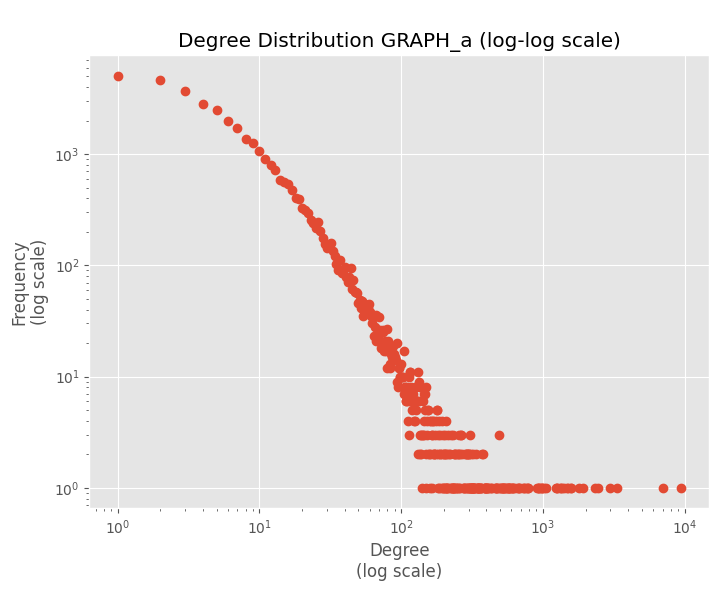

In [ ]:

aux_y_a = nx.degree_histogram(GRAPH_a)
aux_x_a = np.arange(0,len(aux_y_a)).tolist()
n_nodes_a = GRAPH_a.number_of_nodes()

plt.figure(figsize=(8, 6), dpi=100)
plt.title('\nDegree Distribution GRAPH_a (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Frequency\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(aux_x_a, aux_y_a, 'o' )

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Degree_Distribution_GRAPH_a_1.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


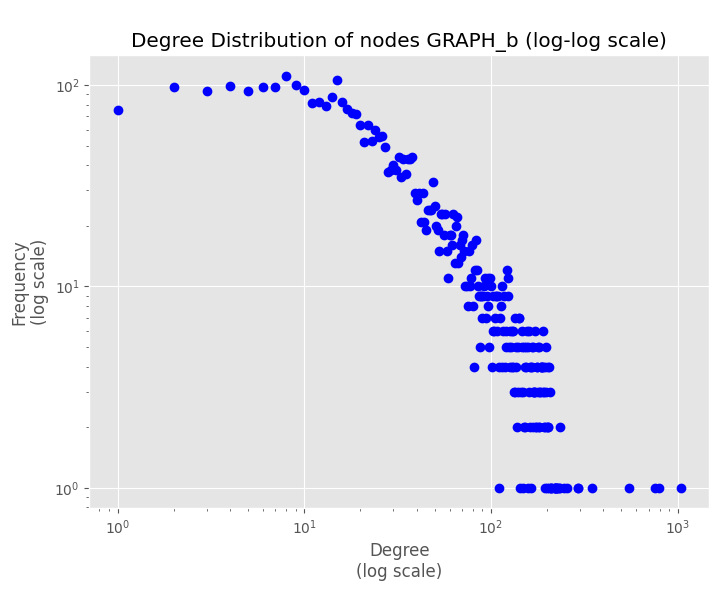

In [ ]:

aux_y_b = nx.degree_histogram(GRAPH_b)
aux_x_b = np.arange(0,len(aux_y_b)).tolist()
n_nodes_b = GRAPH_b.number_of_nodes()

plt.figure(figsize=(8, 6), dpi=100)
plt.title('\nDegree Distribution of nodes GRAPH_b (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Frequency\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(aux_x_b, aux_y_b, 'ob')

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Degree_Distribution_GRAPH_b_1.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


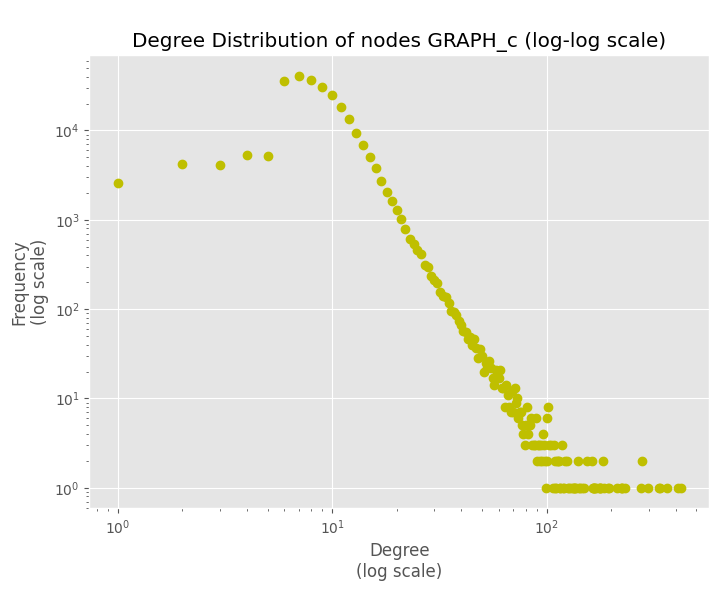

In [ ]:

aux_y_c = nx.degree_histogram(GRAPH_c)
aux_x_c = np.arange(0,len(aux_y_c)).tolist()
n_nodes_c = GRAPH_c.number_of_nodes()

plt.figure(figsize=(8, 6), dpi=100)
plt.title('\nDegree Distribution of nodes GRAPH_c (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Frequency\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(aux_x_c, aux_y_c, 'oy')

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Degree_Distribution_GRAPH_c_1.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


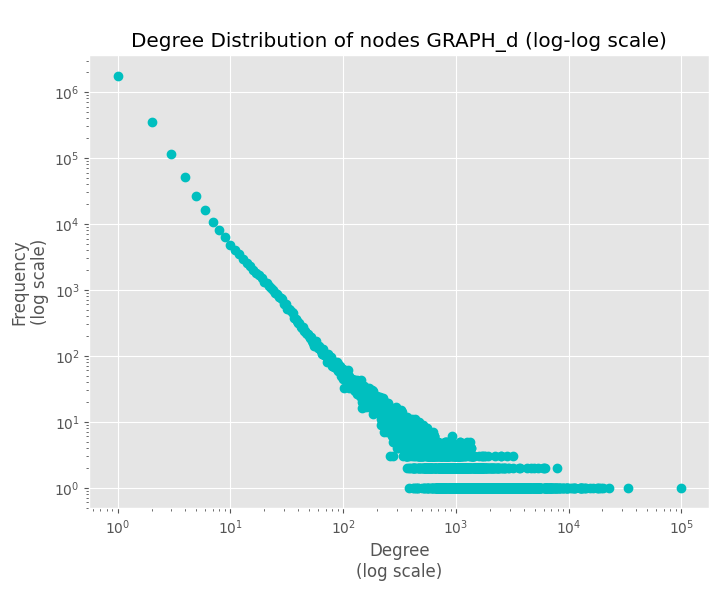

In [ ]:

aux_y_d = nx.degree_histogram(GRAPH_d)
aux_x_d = np.arange(0,len(aux_y_d)).tolist()
n_nodes_d = GRAPH_d.number_of_nodes()

plt.figure(figsize=(8, 6), dpi=100)
plt.title('\nDegree Distribution of nodes GRAPH_d (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Frequency\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(aux_x_d, aux_y_d, 'oc')

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Degree_Distribution_GRAPH_d_1.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


Text(0, 0.5, 'p(k)')

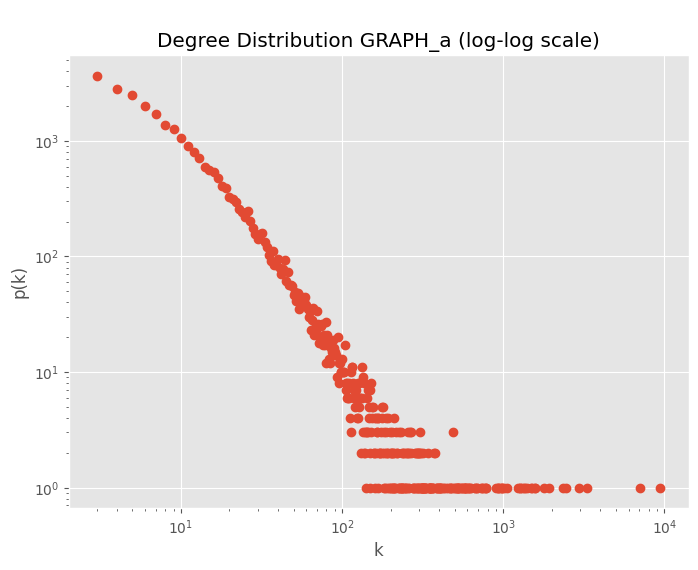

In [ ]:

m=3
degree_freq = nx.degree_histogram(GRAPH_a)
degrees = range(len(degree_freq))
plt.figure(figsize=(8, 6), dpi=100)
plt.title('\nDegree Distribution GRAPH_a (log-log scale)')
plt.loglog(degrees[m:], degree_freq[m:],'o')
plt.xlabel('k')
plt.ylabel('p(k)')

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Degree_Distribution_GRAPH_a.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


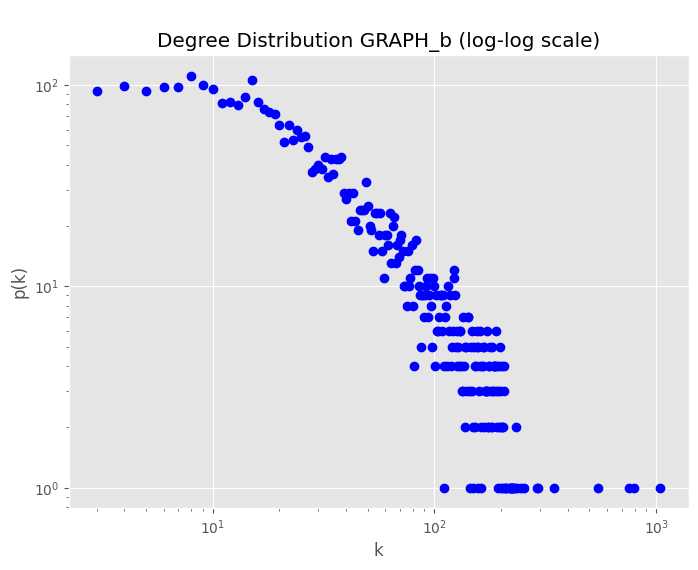

In [ ]:

m=3
degree_freq = nx.degree_histogram(GRAPH_b)
degrees = range(len(degree_freq))
plt.figure(figsize=(8, 6), dpi=100)
plt.title('\nDegree Distribution GRAPH_b (log-log scale)')
plt.loglog(degrees[m:], degree_freq[m:],'ob')
plt.xlabel('k')
plt.ylabel('p(k)')

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Degree_Distribution_GRAPH_b.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

def degree_histogram_directed(G, in_degree=False, out_degree=False):

    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq


In [ ]:

def degree_distrib_directed(G, title=None):

  in_degree_freq = degree_histogram_directed(G, in_degree=True)
  out_degree_freq = degree_histogram_directed(G, out_degree=True)
  degrees = range(len(in_degree_freq))

  plt.figure(figsize=(8, 6), dpi=100)
  plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'oc', label='in-degree')
  plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'om', label='out-degree')
  plt.legend(loc="upper right")
  plt.xlabel('k')
  plt.ylabel('p(k)')

  if title==None:
    plt.title('\nDegree Distribution GRAPH_c (log-log scale)')
  else:
    plt.title('\nDegree Distribution GRAPH_d (log-log scale)')
  #plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/3.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)

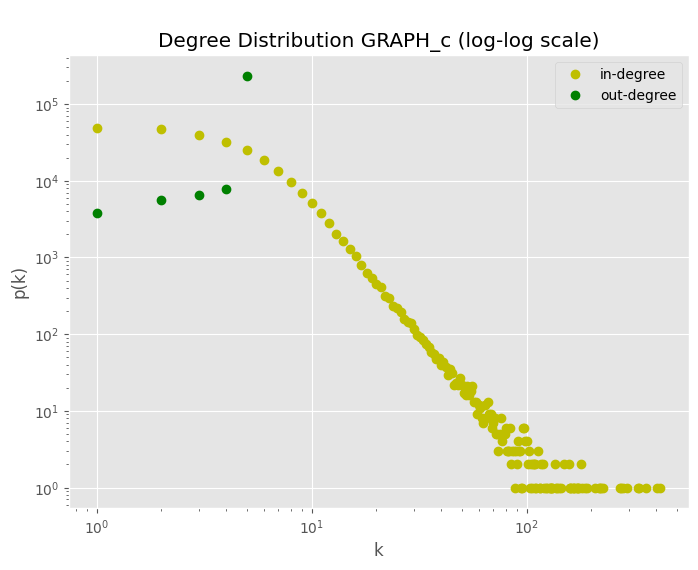

In [ ]:
degree_distrib_c = degree_distrib_directed(GRAPH_c, title=None)

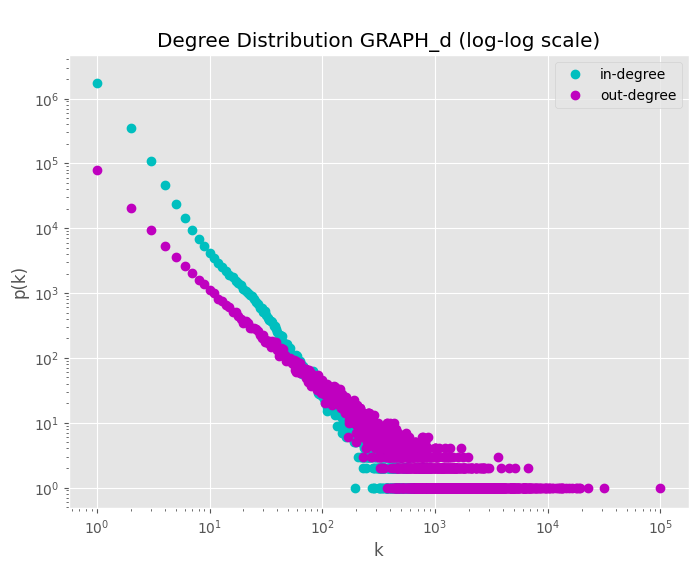

In [ ]:
degree_distrib_d = degree_distrib_directed(GRAPH_d, title=True)

In [ ]:

def plot_degree_dist(G):
    in_degrees = G.in_degree()
    in_degrees=dict(in_degrees)
    in_values = sorted(set(in_degrees.values()))
    in_hist = [list(in_degrees.values()).count(x) for x in in_values]

    plt.subplot(2,1,1)
    plt.grid(False)
    plt.loglog(in_values, in_hist, 'r.')
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.title('In Degree Distribution')

    out_degrees = G.out_degree()
    out_degrees=dict(out_degrees)
    out_values = sorted(set(out_degrees.values()))
    out_hist = [list(out_degrees.values()).count(x) for x in out_values]

    plt.subplot(2,1,2)
    plt.grid(False)
    plt.loglog(out_values, out_hist, 'r.')
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.title('Out Degree Distribution')
    plt.show()


while True:
    s=[]
    while len(s)<2500:
        nextval = int(nx.utils.powerlaw_sequence(1, 2.5)[0]) #100 nodes, power-law exponent 2.5

        if nextval!=0:
            s.append(nextval)

    if sum(s)%2 == 0:
        break

din = s

z = [0]*len(s)
for k in range(len(s)):

    randnum = int(random.uniform(0,1)*30)

    if random.uniform(0,1)>0.1:
        z[k]=s[k]+randnum
        z[len(s)-k-1]=s[len(s)-k-1]-randnum

    else:
        z[k] = s[k]
        z[len(s)-k-1] = s[len(s)-k-1]

    if k==int(len(s)/2.0-1):
        break

print(sum(s),sum(z))

dout = z


8052 8052


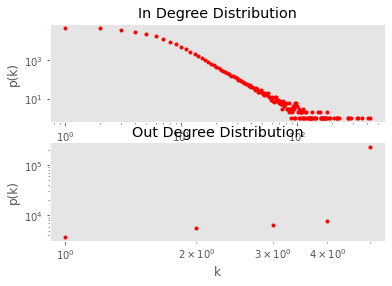

In [ ]:
plot_degree_dist(GRAPH_c)

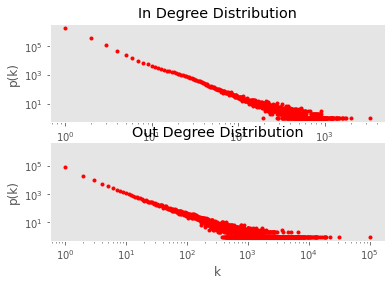

In [ ]:
plot_degree_dist(GRAPH_d)

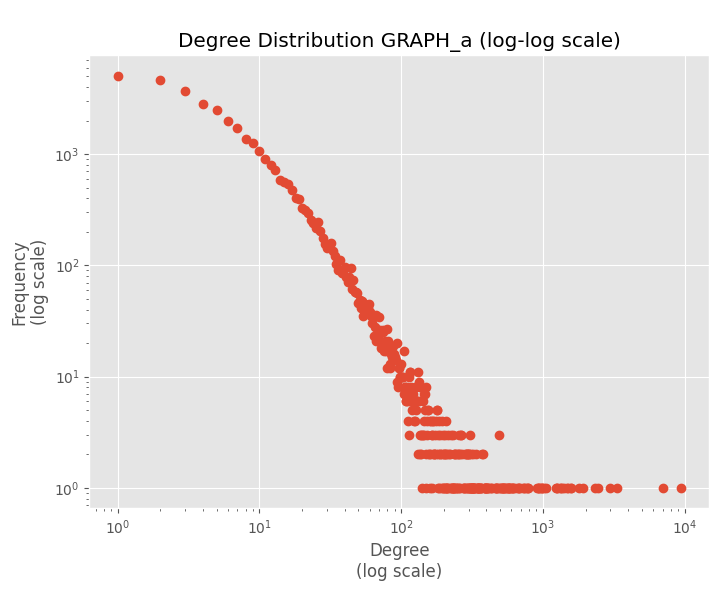

In [ ]:

aux_y_a = nx.degree_histogram(GRAPH_a)
aux_x_a = np.arange(0,len(aux_y_a)).tolist()
n_nodes_a = GRAPH_a.number_of_nodes()

plt.figure(figsize=(8, 6), dpi=100)
plt.title('\nDegree Distribution GRAPH_a (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Frequency\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(aux_x_a, aux_y_a, 'o' )


In [ ]:

degree_a = "SELECT nodes, degrees FROM df_degree_a ;"
cur.execute(degree_a)
o1 = cur.fetchall()

df_d_a = pd.DataFrame(o1, columns=['node','degree'])
df_d_a


,node,degree
0,0,1
1,23977,32
2,1,8
3,34526,2
4,2370,40
...,...,...
37695,35174,1
37696,37485,1
37697,37431,1
37698,37409,1


# **2.0 Centrality Distributions**

**3.1 Betweenness Centrality**

In [ ]:

bca1 = "SELECT node, betweenness_centrality FROM df_betweenness_centrality_GRAPH_a ;"
cur.execute(bca1)
bca = cur.fetchall()


In [ ]:
df_bca = pd.DataFrame(bca, columns=['node', 'bc'])
df_bca

,node,bc
0,0,0.000027
1,23977,0.000101
2,1,0.000027
3,34526,0.000027
4,2370,0.000047
...,...,...
37695,35174,0.000027
37696,37485,0.000027
37697,37431,0.000027
37698,37409,0.000027


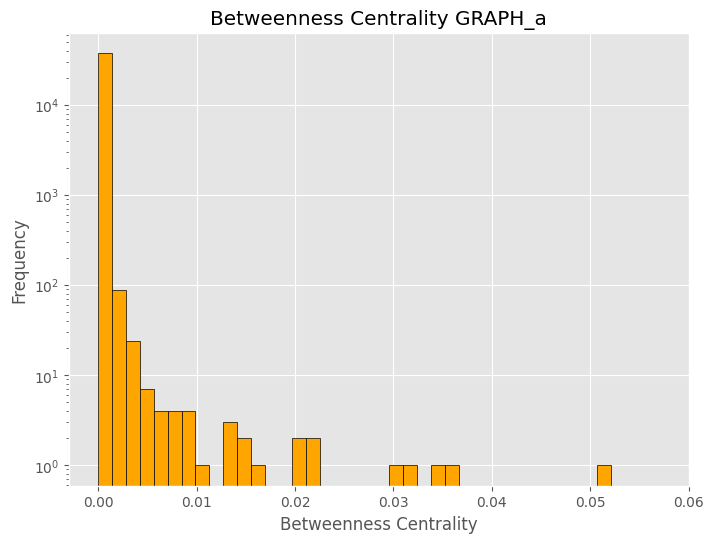

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_bca['bc'], color='orange', edgecolor='black', bins=200)
plt.xlim(left=-0.003,right=0.06)
plt.title('Betweenness Centrality GRAPH_a')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Betweenness_Centrality_GRAPH_a.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:
bcb1 = "SELECT node, bc FROM df_betweenness_centrality_GRAPH_b ;"
bcb2 = cur.execute(bcb1)
bcb = cur.fetchall()

In [ ]:
df_bcb = pd.DataFrame(bcb, columns=['node', 'bc'])
df_bcb

,node,bc
0,1,0.000249
1,0,0.158249
2,2,0.000248
3,3,0.000251
4,4,0.001247
...,...,...
4034,4034,0.000248
4035,4035,0.000248
4036,4036,0.000248
4037,4037,0.000248


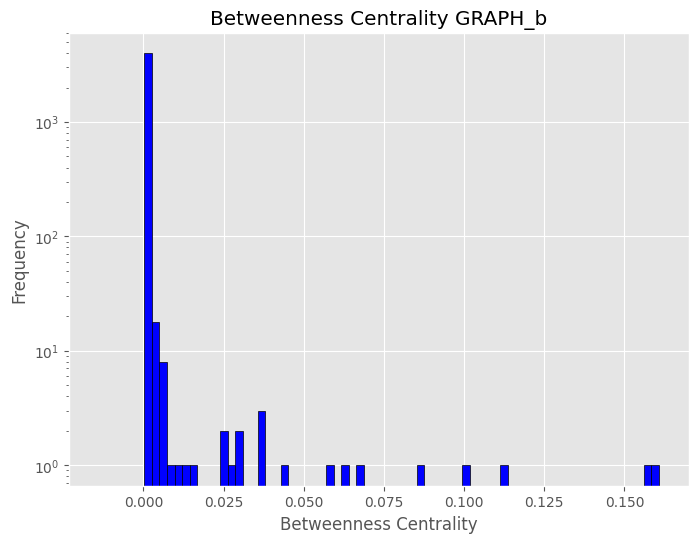

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_bcb['bc'], color='blue', bins=200, edgecolor='black')
plt.title('Betweenness Centrality GRAPH_b')
plt.xlim(right=0.17)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Betweenness_Centrality_GRAPH_b.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:
bcc1 = "SELECT node, betweenness_centrality FROM df_betweenness_centrality_GRAPH_c ;"
bcc2 = cur.execute(bcc1)
bcc = cur.fetchall()

df_bcc = pd.DataFrame(bcc, columns=['node', 'bc'])
df_bcc

,node,bc
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,0.000057
...,...,...
262106,262107,0.000007
262107,262106,0.000003
262108,262105,0.000003
262109,262110,0.000003


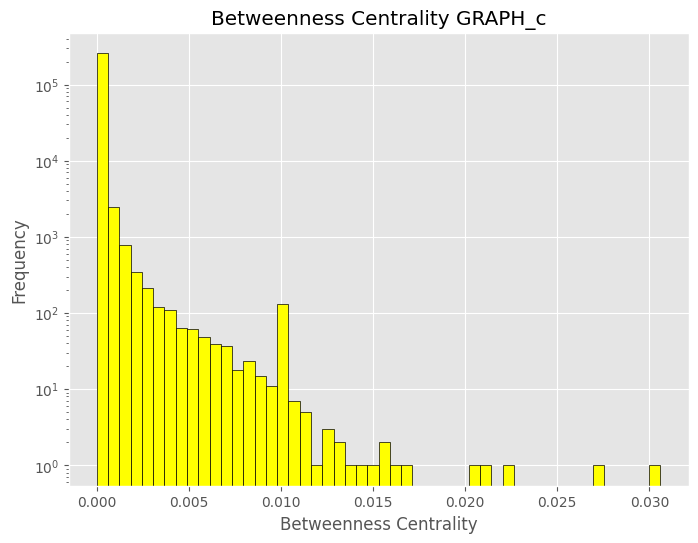

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_bcc['bc'], color='yellow', bins=50, edgecolor='black')
plt.title('Betweenness Centrality GRAPH_c')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Betweenness_Centrality_GRAPH_c.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:
bcd1 = "SELECT node, betweenness_centrality FROM df_betweenness_centrality_GRAPH_d ;"
bcd2 = cur.execute(bcd1)
bcd = cur.fetchall()

df_bcd = pd.DataFrame(bcd, columns=['node', 'bc'])
df_bcd

,node,bc
0,0,2.784293e-08
1,1,2.784293e-08
2,2,1.877287e-07
3,21,2.784293e-08
4,46,7.508192e-07
...,...,...
2394380,2393725,0.000000e+00
2394381,2393740,0.000000e+00
2394382,2393816,0.000000e+00
2394383,2393817,0.000000e+00


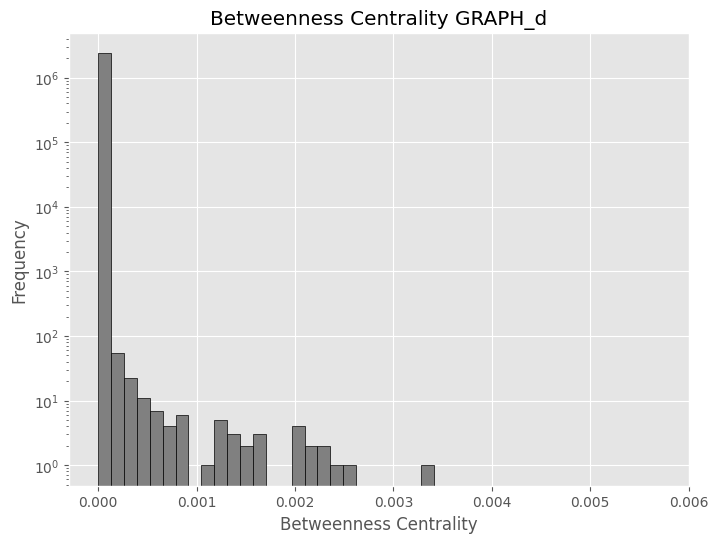

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_bcd['bc'], color='gray', bins=500, edgecolor='black')
plt.xlim(left=-0.0003,right=0.006)
plt.title('Betweenness Centrality GRAPH_d')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Betweenness_Centrality_GRAPH_d.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


**3.2 Closeness Centrality**

In [ ]:

cca1 = "SELECT node, closeness_centrality FROM df_closeness_centrality_a ;"
cur.execute(cca1)
cca = cur.fetchall()

df_cca = pd.DataFrame(cca, columns=['node', 'cc'])
df_cca


,node,cc
0,0,0.275027
1,23977,0.379357
2,1,0.294980
3,34526,0.287230
4,2370,0.375365
...,...,...
37695,35174,0.235560
37696,37485,0.261948
37697,37431,0.267855
37698,37409,0.294862


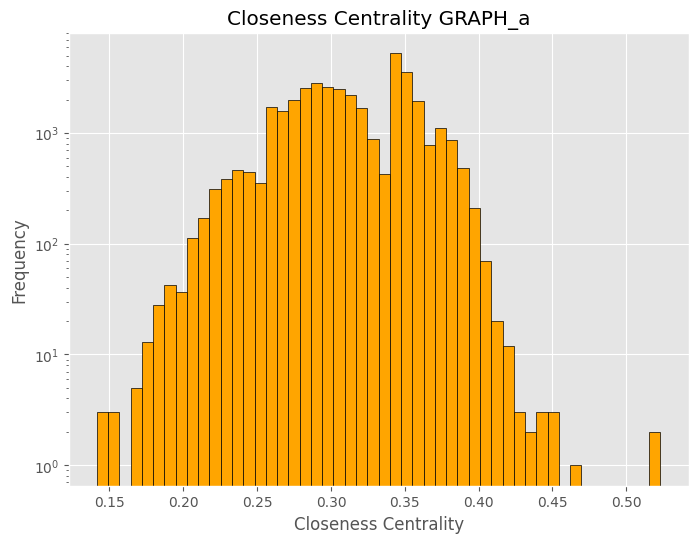

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_cca['cc'], color='orange', edgecolor='black', bins=50)
plt.title('Closeness Centrality GRAPH_a')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Closeness_Centrality_GRAPH_a.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

ccb1 = "SELECT node, closeness_centrality FROM df_closeness_centrality_b ;"
cur.execute(ccb1)
ccb = cur.fetchall()

df_ccb = pd.DataFrame(ccb, columns=['node', 'cc'])
df_ccb


,node,cc
0,1,0.261376
1,0,0.353343
2,2,0.261258
3,3,0.261376
4,4,0.261258
...,...,...
4034,4034,0.183989
4035,4035,0.183980
4036,4036,0.183989
4037,4037,0.184005


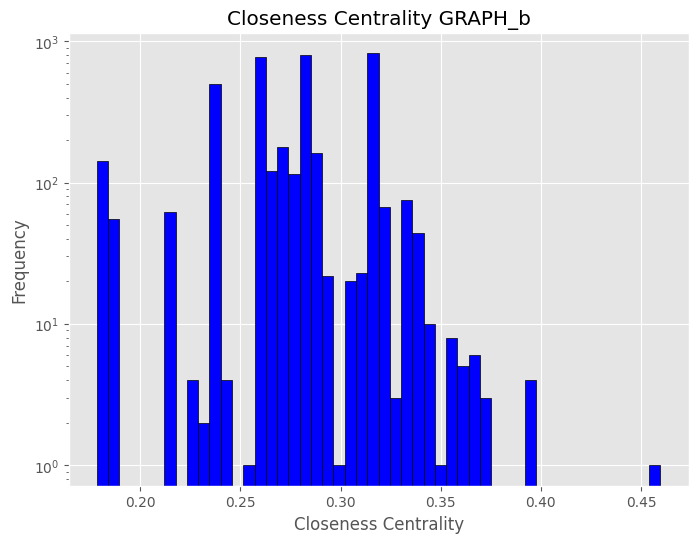

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_ccb['cc'], color='blue', edgecolor='black', bins=50)
plt.title('Closeness Centrality GRAPH_b')
#plt.xlim(left=0.2, right=0.38)
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Closeness_Centrality_GRAPH_b.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

ccc1 = "SELECT random_c_node, closeness_centrality FROM df_closeness_centrality_c2 ;"
cur.execute(ccc1)
ccc = cur.fetchall()

df_ccc = pd.DataFrame(ccc, columns=['node', 'cc'])
df_ccc


,node,cc
0,29906,0.046030
1,94703,0.047969
2,198570,0.048422
3,210620,0.046794
4,86124,0.040876
...,...,...
9995,163238,0.055267
9996,175883,0.047643
9997,63336,0.059193
9998,48139,0.063240


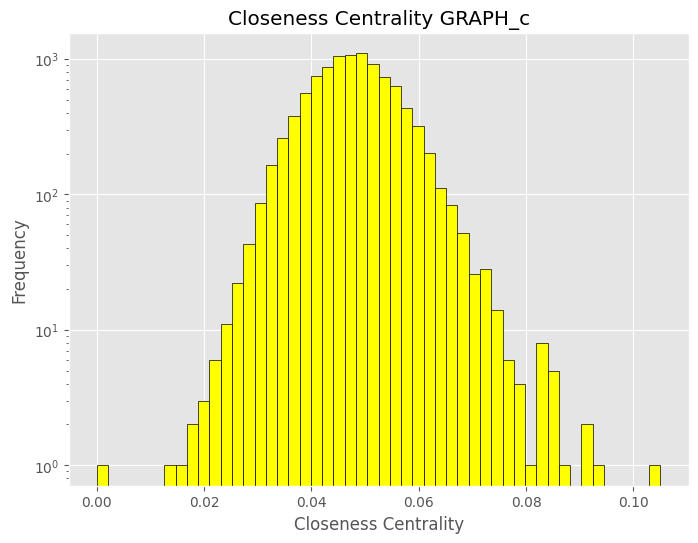

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_ccc['cc'], color='yellow', edgecolor='black', bins=50)
plt.title('Closeness Centrality GRAPH_c')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Closeness_Centrality_GRAPH_c.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

ccd1 = "SELECT random_c_node, closeness_centrality FROM df_closeness_centrality_d2 ;"
cur.execute(ccd1)
ccd = cur.fetchall()

df_ccd = pd.DataFrame(ccd, columns=['node', 'cc'])
df_ccd


,node,cc
0,2102061,0.011612
1,1198575,0.012213
2,1972165,0.014874
3,1456746,0.013502
4,2023440,0.012972
...,...,...
9995,1275624,0.014058
9996,2062550,0.013194
9997,1247865,0.013713
9998,632953,0.012773


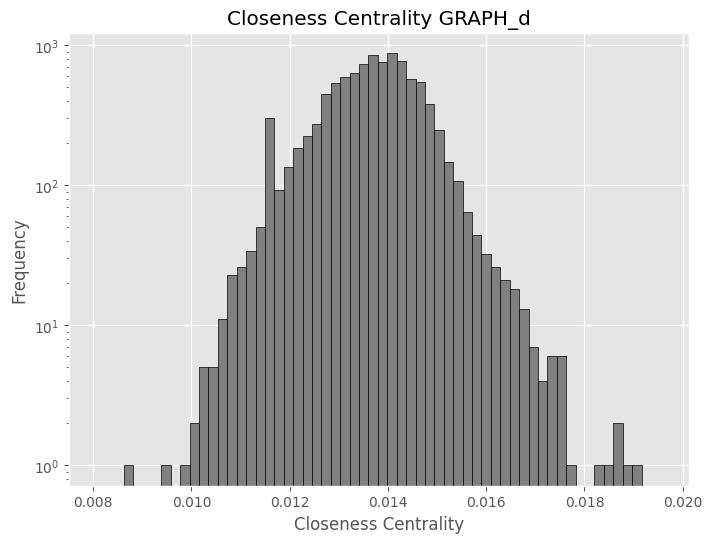

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_ccd['cc'], color='gray', edgecolor='black', bins=100)
plt.title('Closeness Centrality GRAPH_d')
plt.xlim(left=0.0075)
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Closeness_Centrality_GRAPH_d.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


**3.3 Degree Centrality**

In [ ]:

dca1 = "SELECT node, degree_centrality FROM df_degree_centrality_a ;"
cur.execute(dca1)
dca = cur.fetchall()

df_dca = pd.DataFrame(dca, columns=['node', 'dc'])
df_dca


,node,dc
0,0,0.000027
1,23977,0.000849
2,1,0.000212
3,34526,0.000053
4,2370,0.001061
...,...,...
37695,35174,0.000027
37696,37485,0.000027
37697,37431,0.000027
37698,37409,0.000027


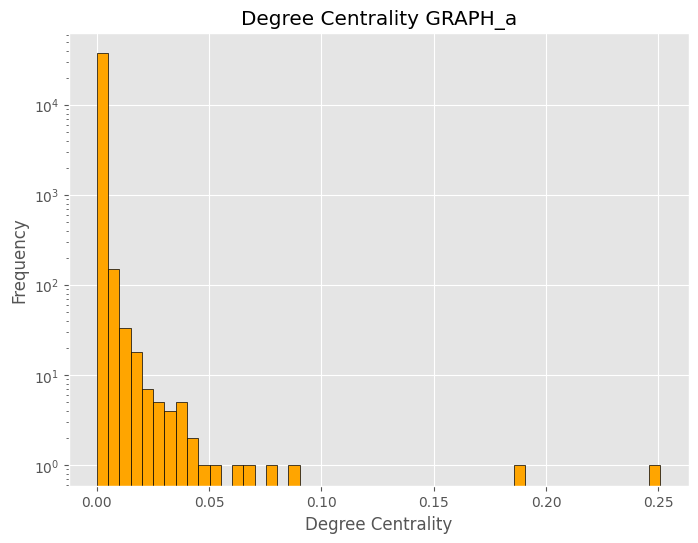

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_dca['dc'], color='orange', edgecolor='black', bins=50)
plt.title('Degree Centrality GRAPH_a')
#plt.xlim(right=0.12)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Degree_Centrality_GRAPH_a.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

dcb1 = "SELECT node, degree_centrality FROM df_degree_centrality_b ;"
cur.execute(dcb1)
dcb = cur.fetchall()

df_dcb = pd.DataFrame(dcb, columns=['node', 'dc'])
df_dcb


,node,dc
0,1,0.004210
1,0,0.085934
2,2,0.002476
3,3,0.004210
4,4,0.002476
...,...,...
4034,4034,0.000495
4035,4035,0.000248
4036,4036,0.000495
4037,4037,0.000991


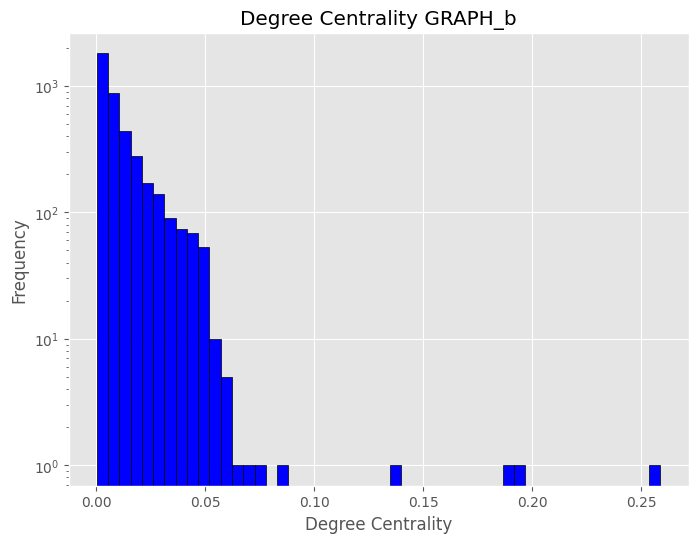

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_dcb['dc'], color='blue', edgecolor='black', bins=50)
plt.title('Degree Centrality GRAPH_b')
#plt.xlim(right=0.11)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Degree_Centrality_GRAPH_b.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

dcc1 = "SELECT node, degree_centrality FROM df_degree_centrality_c ;"
cur.execute(dcc1)
dcc = cur.fetchall()

df_dcc = pd.DataFrame(dcc, columns=['node', 'dc'])
df_dcc


,node,dc
0,0,0.000027
1,1,0.000023
2,2,0.000027
3,3,0.000023
4,4,0.000114
...,...,...
262106,262107,0.000031
262107,262106,0.000027
262108,262105,0.000023
262109,262110,0.000023


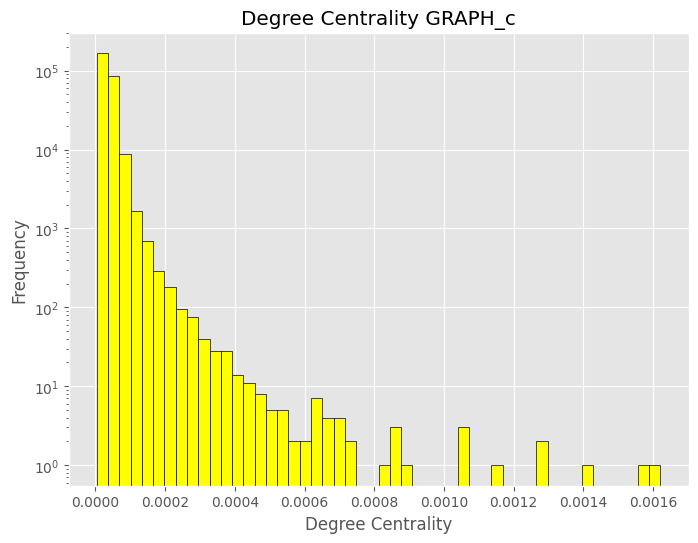

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_dcc['dc'], color='yellow', edgecolor='black', bins=50)
plt.title('Degree Centrality GRAPH_c')
#plt.xlim(right=0.0010)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Degree_Centrality_GRAPH_c.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

dcd1 = "SELECT node, degree_centrality FROM df_degree_centrality_d ;"
cur.execute(dcd1)
dcd = cur.fetchall()

df_dcd = pd.DataFrame(dcd, columns=['node', 'dc'])
df_dcd


,node,dc
0,0,1.252932e-06
1,1,2.088220e-06
2,2,9.856397e-05
3,21,3.549974e-05
4,46,1.286343e-04
...,...,...
2394380,2393725,4.176440e-07
2394381,2393740,4.176440e-07
2394382,2393816,4.176440e-07
2394383,2393817,4.176440e-07


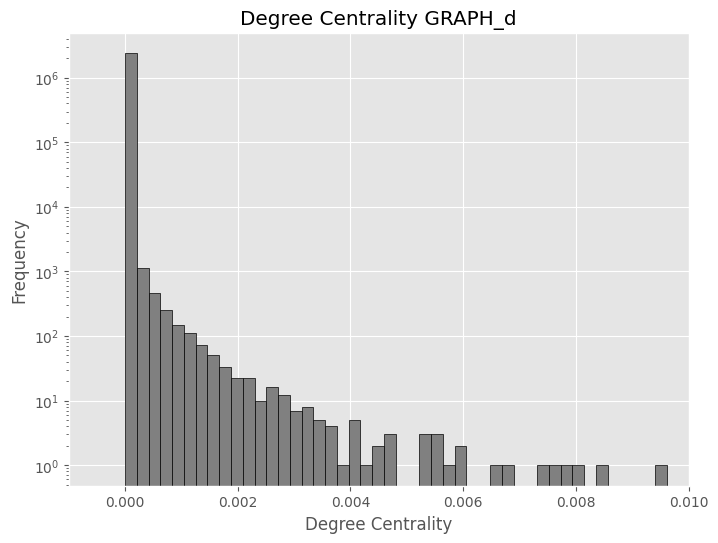

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_dcd['dc'], color='gray', edgecolor='black', bins=200)
plt.title('Degree Centrality GRAPH_d')
plt.xlim(right=0.01, left=-0.001)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Degree_Centrality_GRAPH_d.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


**3.4 Eigenvector Centrality**

In [ ]:

eca1 = "SELECT node, eigenvector_centrality FROM df_eigenvector_centrality_a ;"
cur.execute(eca1)
eca = cur.fetchall()

df_eca = pd.DataFrame(eca, columns=['node', 'ec'])
df_eca


,node,ec
0,0,0.000047
1,23977,0.006982
2,1,0.000952
3,34526,0.000364
4,2370,0.007656
...,...,...
37695,35174,0.000007
37696,37485,0.000033
37697,37431,0.000100
37698,37409,0.000248


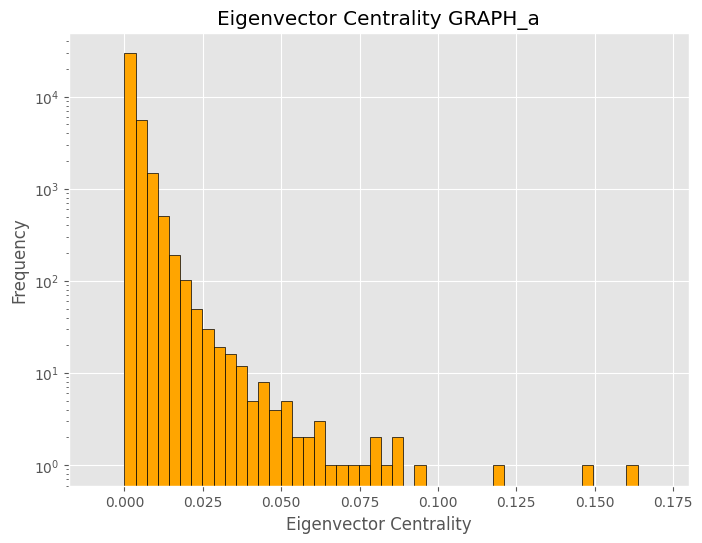

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_eca['ec'], color='orange', edgecolor='black', bins=100)
plt.title('Eigenvector Centrality GRAPH_a')
plt.xlim(right=0.18)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Eigenvector_Centrality_GRAPH_a.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

ecb1 = "SELECT node, eigenvector_centrality FROM df_eigenvector_centrality_b ;"
cur.execute(ecb1)
ecb = cur.fetchall()

df_ecb = pd.DataFrame(ecb, columns=['node', 'ec'])
df_ecb


,node,ec
0,1,5.970601e-07
1,0,3.313350e-05
2,2,2.165775e-07
3,3,6.559843e-07
4,4,2.169066e-07
...,...,...
4034,4034,2.930801e-10
4035,4035,2.892782e-10
4036,4036,2.910939e-10
4037,4037,2.968419e-10


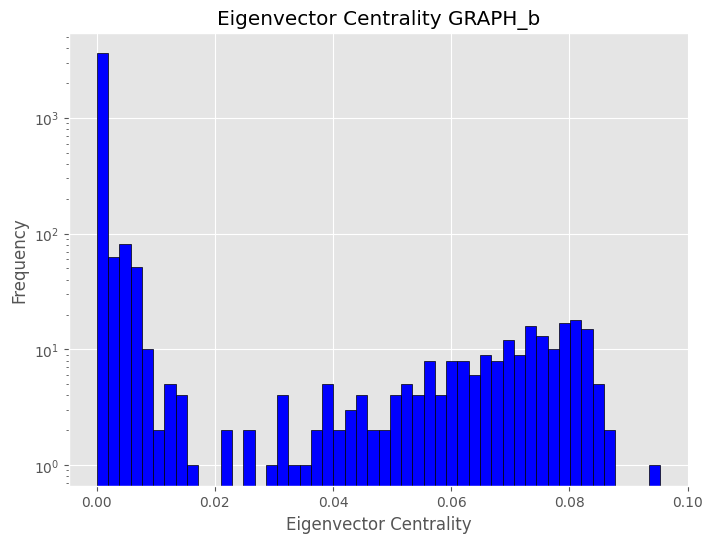

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_ecb['ec'], color='blue', edgecolor='black', bins=50)
plt.title('Eigenvector Centrality GRAPH_b')
#plt.xlim(right=0.115)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Eigenvector_Centrality_GRAPH_b.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

ecc1 = "SELECT node, eigenvector_centrality FROM df_eigenvector_centrality_c ;"
cur.execute(ecc1)
ecc = cur.fetchall()

df_ecc = pd.DataFrame(ecc, columns=['node', 'ec'])
df_ecc


,node,ec
0,0,3.873828e-14
1,1,2.396978e-14
2,2,3.873835e-14
3,3,2.520128e-14
4,4,-1.005333e-05
...,...,...
262106,262107,-1.566880e-03
262107,262106,-1.116652e-03
262108,262105,1.070246e-09
262109,262110,-3.133762e-04


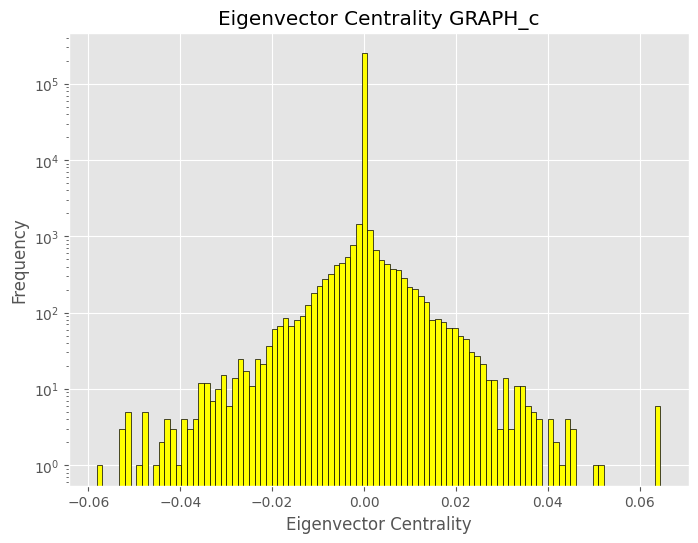

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_ecc['ec'], color='yellow', edgecolor='black', bins=100)
plt.title('Eigenvector Centrality GRAPH_c')
#plt.xlim(right=0.115)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Eigenvector_Centrality_GRAPH_c.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

ecd1 = "SELECT node, eigenvector_centrality FROM df_eigenvector_centrality_d ;"
cur.execute(ecd1)
ecd = cur.fetchall()

df_ecd = pd.DataFrame(ecd, columns=['node', 'ec'])
df_ecd


,node,ec
0,0,1.517790e-04
1,1,4.039646e-04
2,2,6.930895e-03
3,21,3.948274e-03
4,46,4.701605e-03
...,...,...
2394380,2393725,-9.452908e-20
2394381,2393740,5.667431e-20
2394382,2393816,3.404269e-20
2394383,2393817,-5.782002e-20


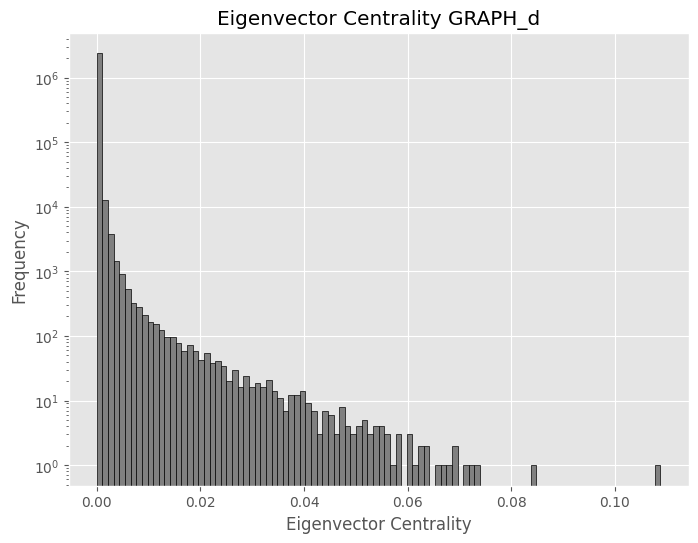

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_ecd['ec'], color='gray', edgecolor='black', bins=100)
plt.title('Eigenvector Centrality GRAPH_d')
#plt.xlim(right=0.08)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Eigenvector_Centrality_GRAPH_d.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


# **3.0 Clustering Coef**

In [ ]:

clca1 = "SELECT node, clustering_coefficient FROM df_clustering_coefficient_a ;"
cur.execute(clca1)
clca = cur.fetchall()

df_clca = pd.DataFrame(clca, columns=['node', 'clc'])
df_clca


,node,clc
0,0,0.000000
1,23977,0.098790
2,1,0.178571
3,34526,0.000000
4,2370,0.176923
...,...,...
37695,35174,0.000000
37696,37485,0.000000
37697,37431,0.000000
37698,37409,0.000000


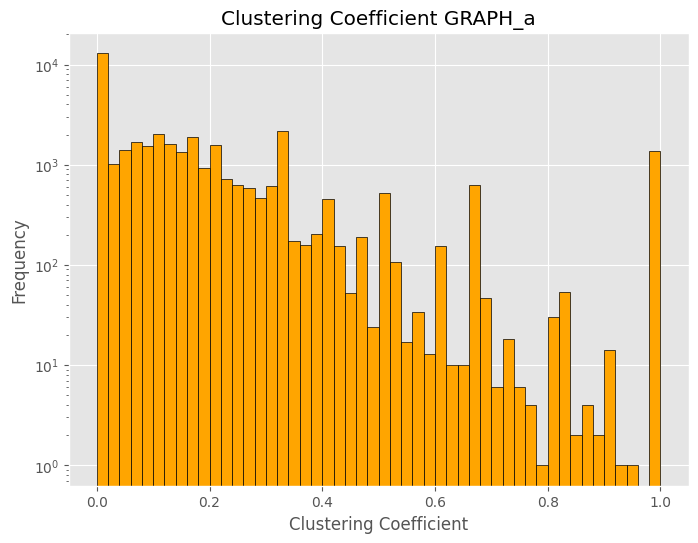

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_clca['clc'], color='orange', edgecolor='black', bins=50)
plt.title('Clustering Coefficient GRAPH_a')
#plt.xlim(right=0.115)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/clc_GRAPH_a.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

clcb1 = "SELECT node, clustering_coefficient FROM df_clustering_coefficient_b ;"
cur.execute(clcb1)
clcb = cur.fetchall()

df_clcb = pd.DataFrame(clcb, columns=['node', 'clc'])
df_clcb


,node,clc
0,1,0.419118
1,0,0.041962
2,2,0.888889
3,3,0.632353
4,4,0.866667
...,...,...
4034,4034,1.000000
4035,4035,0.000000
4036,4036,1.000000
4037,4037,0.666667


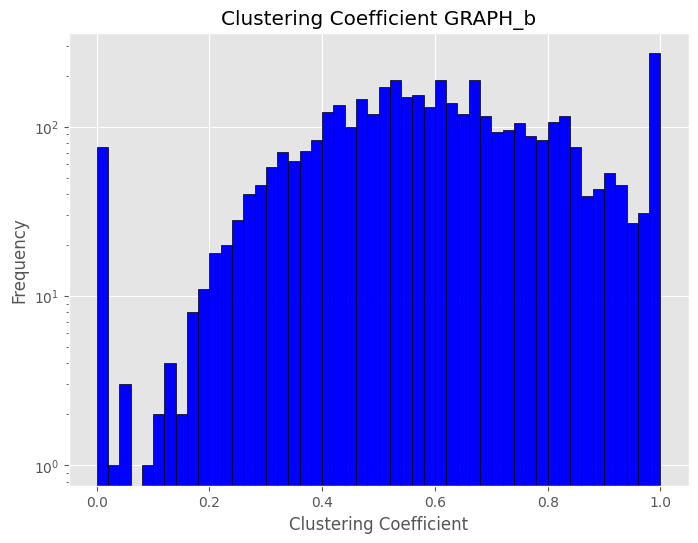

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_clcb['clc'], color='blue', edgecolor='black', bins=50)
plt.title('Clustering Coefficient GRAPH_b')
#plt.xlim(right=0.115)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/clc_GRAPH_b.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

clcc1 = "SELECT node, clustering_coefficient FROM df_clustering_coefficient_c ;"
cur.execute(clcc1)
clcc = cur.fetchall()

df_clcc = pd.DataFrame(clcc, columns=['node', 'clc'])
df_clcc


,node,clc
0,0,0.210526
1,1,0.285714
2,2,0.125000
3,3,0.300000
4,4,0.100462
...,...,...
262106,262107,0.557692
262107,262106,0.700000
262108,262105,0.500000
262109,262110,0.571429


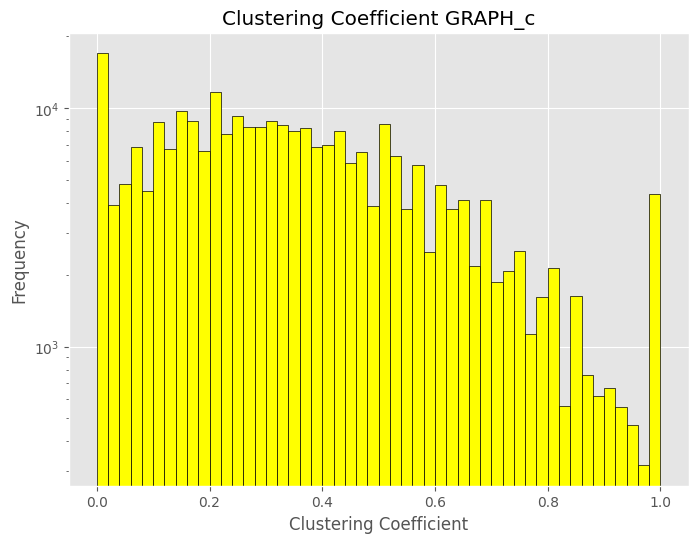

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_clcc['clc'], color='yellow', edgecolor='black', bins=50)
plt.title('Clustering Coefficient GRAPH_c')
#plt.xlim(right=0.115)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/clc_GRAPH_c.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

clcd1 = "SELECT node, clustering_coefficient FROM df_clustering_coefficient_d ;"
cur.execute(clcd1)
clcd = cur.fetchall()

df_clcd = pd.DataFrame(clcc, columns=['node', 'clc'])
df_clcd


,node,clc
0,0,0.210526
1,1,0.285714
2,2,0.125000
3,3,0.300000
4,4,0.100462
...,...,...
262106,262107,0.557692
262107,262106,0.700000
262108,262105,0.500000
262109,262110,0.571429


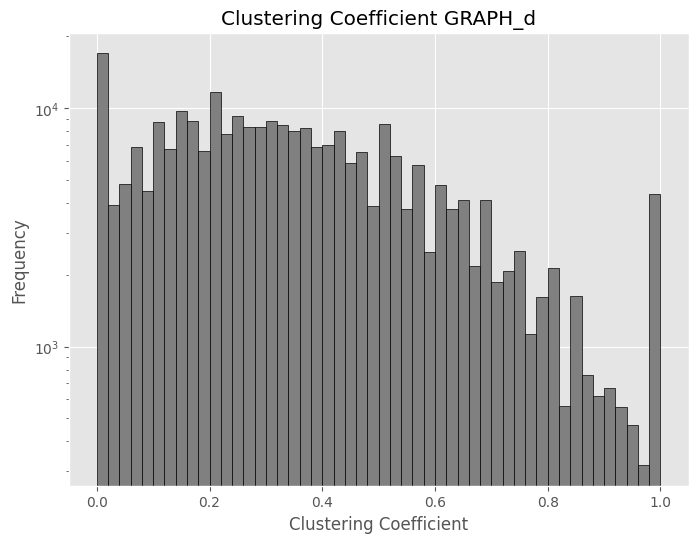

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_clcd['clc'], color='gray', edgecolor='black', bins=50)
plt.title('Clustering Coefficient GRAPH_d')
#plt.xlim(right=0.115)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/clc_GRAPH_d.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


# **4.0 Degree**

In [ ]:

da1 = "SELECT nodes, degrees FROM df_degree_a ;"
cur.execute(da1)
da = cur.fetchall()

df_da = pd.DataFrame(da, columns=['node', 'd'])
df_da


,node,d
0,0,1
1,23977,32
2,1,8
3,34526,2
4,2370,40
...,...,...
37695,35174,1
37696,37485,1
37697,37431,1
37698,37409,1


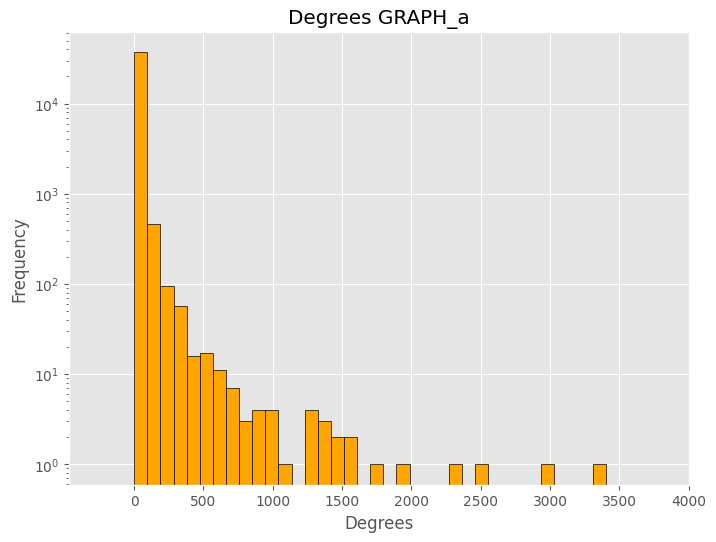

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_da['d'], color='orange', edgecolor='black', bins=100)
plt.title('Degrees GRAPH_a')
plt.xlim(right=4000)
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/degrees_GRAPH_a.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

db1 = "SELECT nodes, degrees FROM df_degree_b ;"
cur.execute(db1)
db = cur.fetchall()

df_db = pd.DataFrame(db, columns=['node', 'd'])
df_db


,node,d
0,1,17
1,0,347
2,2,10
3,3,17
4,4,10
...,...,...
4034,4034,2
4035,4035,1
4036,4036,2
4037,4037,4


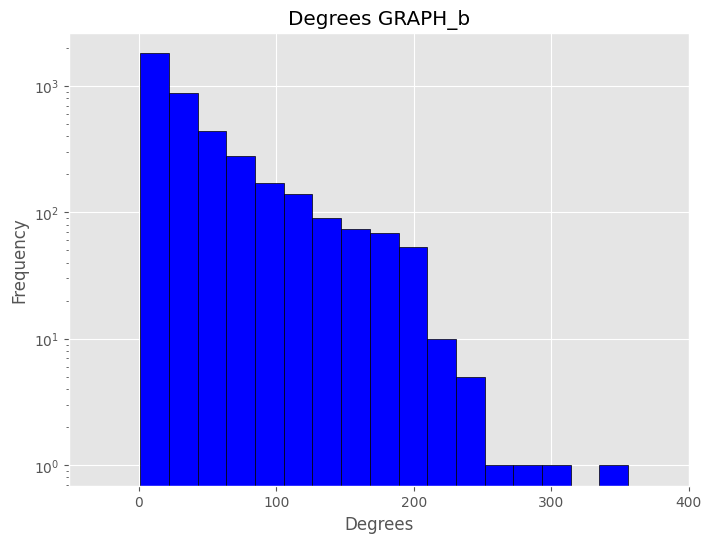

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_db['d'], color='blue', edgecolor='black', bins=50)
plt.title('Degrees GRAPH_b')
plt.xlim(right=400)
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/degrees_GRAPH_b.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

dc1 = "SELECT nodes, degrees FROM df_degree_c ;"
cur.execute(dc1)
dc = cur.fetchall()

df_dc = pd.DataFrame(dc, columns=['node', 'd'])
df_dc


,node,d
0,0,7
1,1,6
2,2,7
3,3,6
4,4,30
...,...,...
262106,262107,8
262107,262106,7
262108,262105,6
262109,262110,6


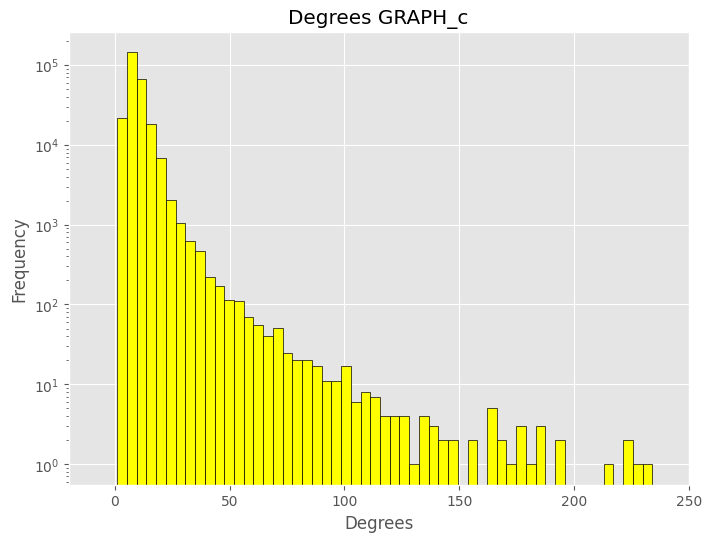

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_dc['d'], color='yellow', edgecolor='black', bins=100)
plt.title('Degrees GRAPH_c')
plt.xlim(right=250)
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/degrees_GRAPH_c.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

dd1 = "SELECT nodes, degrees FROM df_degree_d ;"
cur.execute(dd1)
dd = cur.fetchall()

df_dd = pd.DataFrame(dd, columns=['node', 'd'])
df_dd


,node,d
0,0,3
1,1,5
2,2,236
3,21,85
4,46,308
...,...,...
2394380,2393725,1
2394381,2393740,1
2394382,2393816,1
2394383,2393817,1


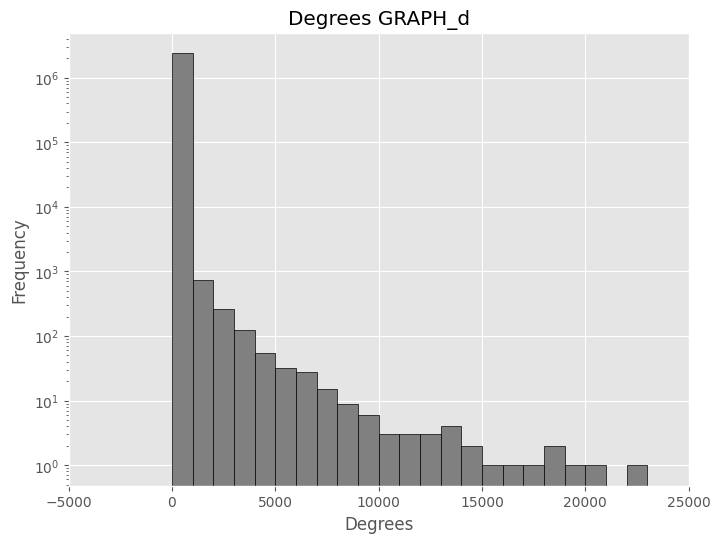

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_dd['d'], color='gray', edgecolor='black', bins=100)
plt.title('Degrees GRAPH_d')
plt.xlim(right=25000)
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/degrees_GRAPH_d.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


# **5.0 Triangles**

In [ ]:

ta1 = "SELECT node, number_of_triangles FROM df_triangles_a ;"
cur.execute(ta1)
ta = cur.fetchall()

df_ta = pd.DataFrame(ta, columns=['node', 't'])
df_ta


,node,t
0,0,0
1,23977,49
2,1,5
3,34526,0
4,2370,138
...,...,...
37695,35174,0
37696,37485,0
37697,37431,0
37698,37409,0


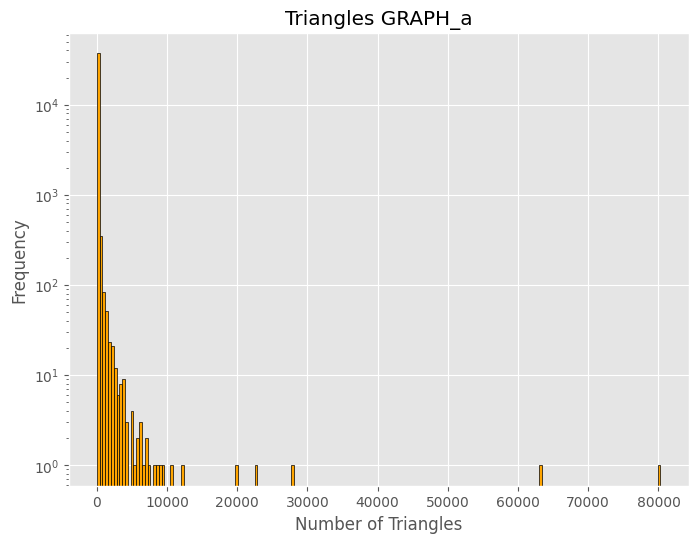

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_ta['t'], color='orange', edgecolor='black', bins=200)
plt.title('Triangles GRAPH_a')
#plt.xlim(right=31000)
plt.xlabel('Number of Triangles')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/triangles_GRAPH_a.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

tb1 = "SELECT node, number_of_triangles FROM df_triangles_b ;"
cur.execute(tb1)
tb = cur.fetchall()

df_tb = pd.DataFrame(tb, columns=['node', 't'])
df_tb


,node,t
0,1,57
1,0,2519
2,2,40
3,3,86
4,4,39
...,...,...
4034,4034,1
4035,4035,0
4036,4036,1
4037,4037,4


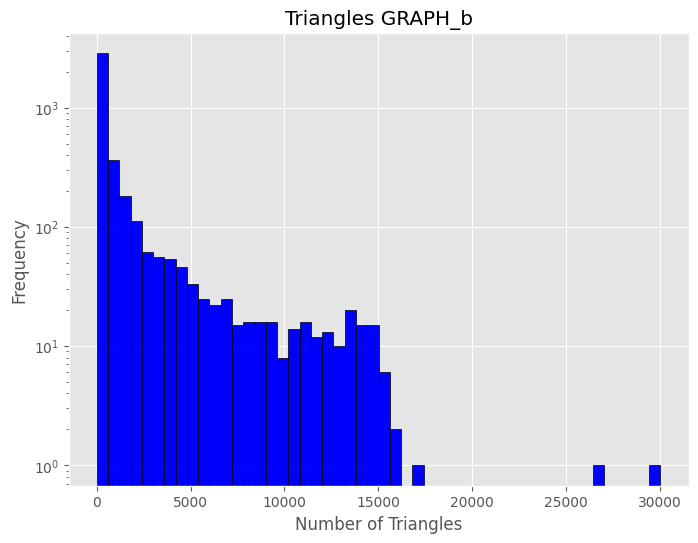

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_tb['t'], color='blue', edgecolor='black', bins=50)
plt.title('Triangles GRAPH_b')
#plt.xlim(right=16850)
plt.xlabel('Number of Triangles')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/triangles_GRAPH_b.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

tc1 = "SELECT node, number_of_directed_triangles FROM df_triangles_c ;"
cur.execute(tc1)
tc = cur.fetchall()

df_tc = pd.DataFrame(tc, columns=['node', 't'])
df_tc


,node,t
0,0,16
1,1,16
2,2,10
3,3,18
4,4,174
...,...,...
262106,262107,58
262107,262106,56
262108,262105,28
262109,262110,32


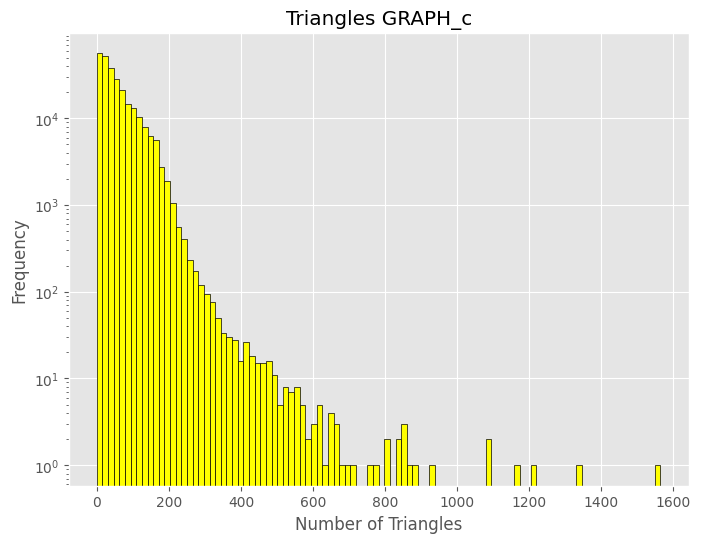

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_tc['t'], color='yellow', edgecolor='black', bins=100)
plt.title('Triangles GRAPH_c')
#plt.xlim(right=1000)
plt.xlabel('Number of Triangles')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/triangles_GRAPH_c.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:

td1 = "SELECT node, number_of_directed_triangles FROM df_triangles_d ;"
cur.execute(td1)
td = cur.fetchall()

df_td = pd.DataFrame(td, columns=['node', 't'])
df_td


,node,t
0,0,0
1,1,12
2,2,10344
3,21,1114
4,46,22586
...,...,...
2394380,2393725,0
2394381,2393740,0
2394382,2393816,0
2394383,2393817,0


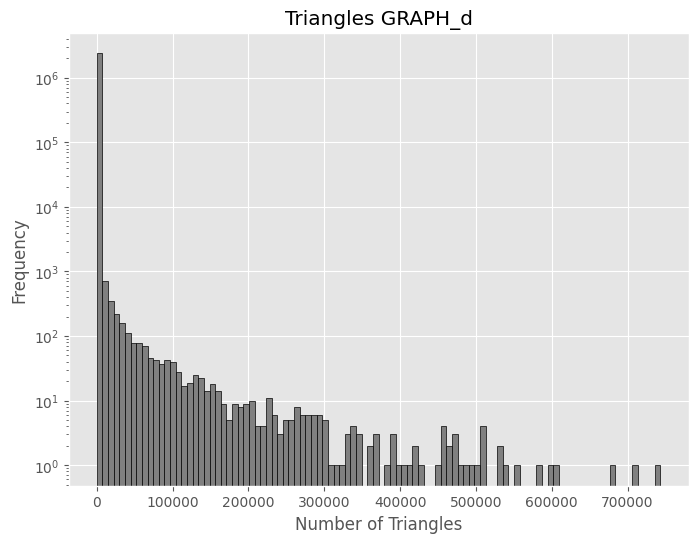

In [ ]:

plt.figure(figsize=(8, 6), dpi=100)
plt.hist(df_td['t'], color='gray', edgecolor='black', bins=100)
plt.title('Triangles GRAPH_d')
#plt.xlim(right=1000)
plt.xlabel('Number of Triangles')
plt.ylabel('Frequency')
plt.xscale("linear")
plt.yscale("log")

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/triangles_GRAPH_d.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


# **6.0 Spectral Clustering**

In [ ]:
# Spectral Clustering GRAPH_a - 3D plot

adj_mat_a = nx.to_scipy_sparse_matrix(GRAPH_a, nodelist=None, dtype=None, weight=None, format='csr')

sc_a = sklearn.cluster.SpectralClustering(n_clusters=5, assign_labels='kmeans', affinity='precomputed')

labels_a = sc_a.fit_predict(adj_mat_a) # Took 1:13 hours

se_a = SpectralEmbedding(n_components=3, affinity='precomputed') # n_components = 2d or 3d

X1 = se_a.fit_transform(adj_mat_a) # Took 53 minutes


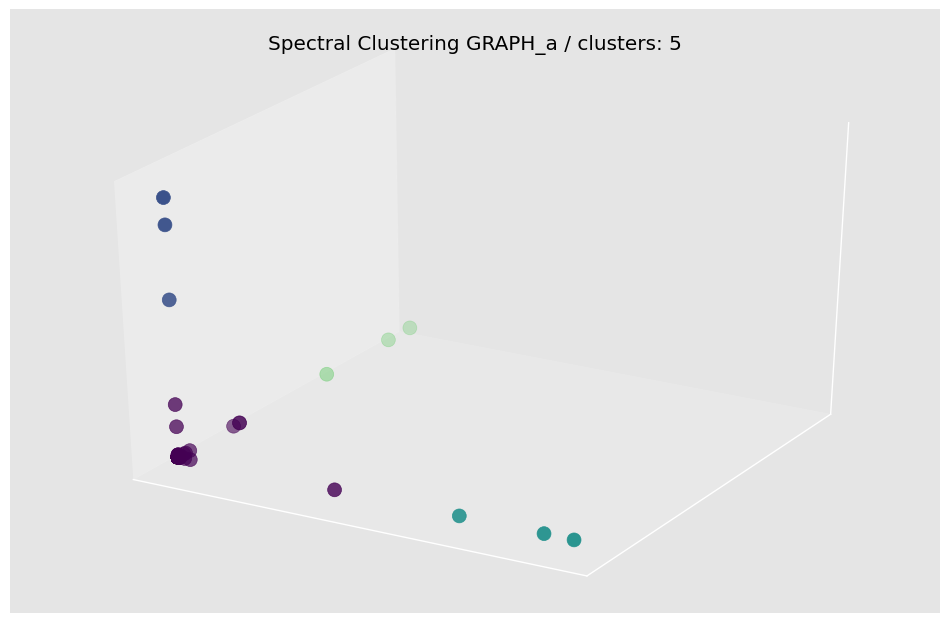

In [ ]:
#  Clustering 3D plot GRAPH_a

fig, ax_a = plt.subplots(1, 1, subplot_kw={'projection': '3d'}, figsize = (12,8), dpi=100)

ax_a.scatter(xs=X1[:,0],ys=X1[:,1],zs=X1[:,2], c=labels_a, s=100)

plt.title('Spectral Clustering GRAPH_a / clusters: 5')
plt.xlabel('')
plt.ylabel('')

ax_a.get_xaxis().set_ticks([])
ax_a.get_yaxis().set_ticks([])
ax_a.get_zaxis().set_ticks([])

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Spectral_Clustering_3D_GRAPH_a.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)


In [ ]:
# Spectral Clustering GRAPH_b - 3D plot

B = nx.to_scipy_sparse_matrix(GRAPH_b, weight='unweighted', format='csr')

B_B = B.toarray()

sc = sklearn.cluster.SpectralClustering(n_clusters=8, assign_labels='kmeans', affinity='precomputed')

labels2 = sc.fit_predict(B_B)

n_clusters2 = np.unique(labels2)

se2 = SpectralEmbedding(n_components=3, affinity='precomputed') # n_components = 2d or 3d

X2 = se2.fit_transform(B_B)


In [ ]:
df_labels1 = pd.DataFrame(labels1)
df_labels2

,0
0,4
1,4
2,4
3,4
4,4
...,...
4034,2
4035,2
4036,2
4037,2


In [ ]:
df_labels2.to_csv(r'/content/drive/MyDrive/Thesis/colabtest1/labels2.csv', index=False)

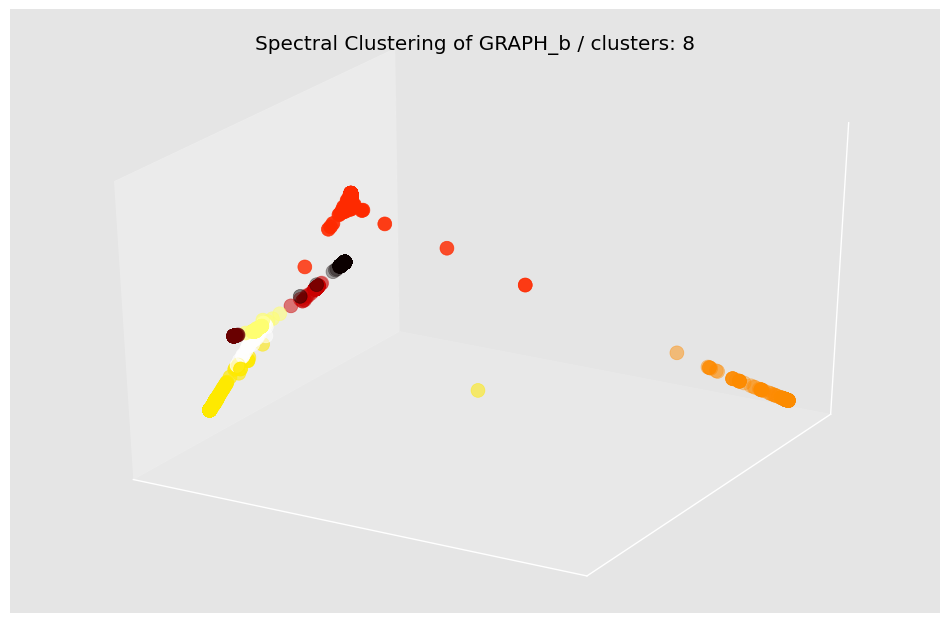

In [ ]:
# Spectral Clustering 3D plot GRAPH_b

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'}, figsize = (12,8), dpi=100)

ax.scatter(xs=X2[:,0],ys=X2[:,1],zs=X2[:,2], c=labels2, s=100)

plt.title('Spectral Clustering of GRAPH_b / clusters: 8')
plt.xlabel('')
plt.ylabel('')

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.get_zaxis().set_ticks([])

#plt.savefig(fname=r'/content/drive/MyDrive/Thesis/colabtest1/Spectral_Clustering_3D_GRAPH_b.png', format='png', bbox_inches='tight', pad_inches=0.1, orientation='landscape', transparent=False)
